In [2]:
import pandas as pd
import numpy as np
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import Model

In [3]:
df = pd.read_csv('patients.csv')

In [4]:
df.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,Marigot Saint Andrew Parish DM,427 Balistreri Way Unit 19,Chicopee,Massachusetts,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88
1,034e9e3b-2def-4559-bb2a-7850888ae060,1983-11-14,NaN,999-73-5361,S99962402,X88275464X,Mr.,Milo271,Feil794,NaN,...,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531,793946.01,3204.49
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992-06-02,NaN,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,...,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,574111.90,2606.40
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978-05-27,NaN,999-85-4926,S99974448,X40915583X,Mrs.,Mariana775,Rutherford999,NaN,...,Yarmouth Massachusetts US,999 Kuhn Forge,Lowell,Massachusetts,Middlesex County,1851.0,42.636143,-71.343255,935630.30,8756.19
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1996-10-18,NaN,999-60-7372,S99915787,X86772962X,Mr.,Gregorio366,Auer97,NaN,...,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,598763.07,3772.20


In [5]:
df.drop(['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'ADDRESS', 'LAST', 'SUFFIX', 'MAIDEN','LAT', 'LON',], axis=1, inplace=True)
print(df.columns)

Index(['MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'CITY', 'STATE',
       'COUNTY', 'ZIP', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE'],
      dtype='object')


In [6]:
df["MARITAL"] = df["MARITAL"].astype('category').cat.codes
df["RACE"] = df["RACE"].astype('category').cat.codes
df["ETHNICITY"] = df["ETHNICITY"].astype('category').cat.codes
df["GENDER"] = df["GENDER"].astype('category').cat.codes
df["BIRTHPLACE"] = df["BIRTHPLACE"].astype('category').cat.codes
df["CITY"] = df["CITY"].astype('category').cat.codes
df["STATE"] = df["STATE"].astype('category').cat.codes
df["COUNTY"] = df["COUNTY"].astype('category').cat.codes
df["ZIP"] = df["ZIP"].astype('category').cat.codes

In [7]:
df.head()

,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,STATE,COUNTY,ZIP,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,0,4,0,1,136,42,0,6,2,271227.08,1334.88
1,0,4,1,1,61,186,0,8,132,793946.01,3204.49
2,0,4,1,1,236,42,0,6,3,574111.90,2606.40
3,0,4,1,0,291,110,0,8,68,935630.30,8756.19
4,-1,4,1,1,189,24,0,12,125,598763.07,3772.20


In [8]:
HEALTHCARE_EXPENSES_MIN = df["HEALTHCARE_EXPENSES"].min()
HEALTHCARE_EXPENSES_MAX = df["HEALTHCARE_EXPENSES"].max()
print('Min and max healthcare expense', HEALTHCARE_EXPENSES_MIN, HEALTHCARE_EXPENSES_MAX)

HEALTHCARE_COVERAGE_MIN = df["HEALTHCARE_COVERAGE"].min()
HEALTHCARE_COVERAGE_MAX = df["HEALTHCARE_COVERAGE"].max()

print('Min and max healthcare coverage', HEALTHCARE_COVERAGE_MIN, HEALTHCARE_COVERAGE_MAX)

Min and max healthcare expense 1822.1600000000003 2145924.400000002
Min and max healthcare coverage 0.0 927873.5300000022


In [9]:
import numpy as np

df_healthcare_expenses = pd.cut(df['HEALTHCARE_EXPENSES'], bins=np.linspace(HEALTHCARE_EXPENSES_MIN, HEALTHCARE_EXPENSES_MAX, 21), labels=False)
df_healthcare_coverage = pd.cut(df['HEALTHCARE_COVERAGE'], bins=np.linspace(HEALTHCARE_COVERAGE_MIN, HEALTHCARE_COVERAGE_MAX, 21), labels=False)

df.drop(["HEALTHCARE_EXPENSES", "HEALTHCARE_COVERAGE"], axis=1, inplace=True)

df = pd.concat([df, df_healthcare_expenses, df_healthcare_coverage], axis=1)

In [10]:
df.head()

,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,STATE,COUNTY,ZIP,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,0,4,0,1,136,42,0,6,2,2.0,0.0
1,0,4,1,1,61,186,0,8,132,7.0,0.0
2,0,4,1,1,236,42,0,6,3,5.0,0.0
3,0,4,1,0,291,110,0,8,68,8.0,0.0
4,-1,4,1,1,189,24,0,12,125,5.0,0.0


In [11]:
from sklearn.preprocessing import PowerTransformer

df[df.columns] = PowerTransformer(method='yeo-johnson', standardize=True, copy=True).fit_transform(df[df.columns])

print(df)

       MARITAL      RACE  ETHNICITY    GENDER  BIRTHPLACE      CITY  STATE  \
0     0.334507  0.461541  -3.059874  1.040975    0.158023 -0.934665    0.0   
1     0.334507  0.461541   0.326811  1.040975   -0.743838  0.991601    0.0   
2     0.334507  0.461541   0.326811  1.040975    1.059635 -0.934665    0.0   
3     0.334507  0.461541   0.326811 -0.960637    1.482022  0.117825    0.0   
4    -1.275676  0.461541   0.326811  1.040975    0.662666 -1.324473    0.0   
...        ...       ...        ...       ...         ...       ...    ...   
1166  0.334507 -2.207146  -3.059874 -0.960637   -0.098914 -1.118375    0.0   
1167  1.773476  0.461541   0.326811  1.040975    1.210032 -1.400048    0.0   
1168  1.773476  0.461541   0.326811 -0.960637   -0.535455  0.646801    0.0   
1169  0.334507  0.461541   0.326811 -0.960637    1.059635  0.646801    0.0   
1170  0.334507  0.461541   0.326811 -0.960637    1.467316  0.646801    0.0   

        COUNTY       ZIP  HEALTHCARE_EXPENSES  HEALTHCARE_COVER

In [12]:


from tensorflow.keras.optimizers import Adam

class GAN():
    
    def __init__(self, gan_args):
        [self.batch_size, lr, self.noise_dim,
         self.data_dim, layers_dim] = gan_args

        self.generator = Generator(self.batch_size).\
            build_model(input_shape=(self.noise_dim,), dim=layers_dim, data_dim=self.data_dim)

        self.discriminator = Discriminator(self.batch_size).\
            build_model(input_shape=(self.data_dim,), dim=layers_dim)

        optimizer = Adam(lr, 0.5)

        self.discriminator.compile(loss='binary_crossentropy',
                                   optimizer=optimizer,
                                   metrics=['accuracy'])


        z = Input(shape=(self.noise_dim,))
        record = self.generator(z)

        validity = self.discriminator(record)

        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def get_data_batch(self, train, batch_size, seed=0):


        start_i = (batch_size * seed) % len(train)
        stop_i = start_i + batch_size
        shuffle_seed = (batch_size * seed) // len(train)
        np.random.seed(shuffle_seed)
        train_ix = np.random.choice(list(train.index), replace=False, size=len(train))  
        train_ix = list(train_ix) + list(train_ix)  
        x = train.loc[train_ix[start_i: stop_i]].values
        return np.reshape(x, (batch_size, -1))
        
    def train(self, data, train_arguments):
        [cache_prefix, epochs, sample_interval] = train_arguments
        
        data_cols = data.columns

        valid = np.ones((self.batch_size, 1))
        fake = np.zeros((self.batch_size, 1))

        for epoch in range(epochs):    
            # ---------------------
            #  Train Discriminator
            # ---------------------
            batch_data = self.get_data_batch(data, self.batch_size)
            noise = tf.random.normal((self.batch_size, self.noise_dim))


            gen_data = self.generator.predict(noise)
    
            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(batch_data, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_data, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
            # ---------------------
            #  Train Generator
            # ---------------------
            noise = tf.random.normal((self.batch_size, self.noise_dim))

            g_loss = self.combined.train_on_batch(noise, valid)
    

            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss))

            if epoch % sample_interval == 0:
                model_checkpoint_base_name = 'model/' + cache_prefix + '_{}_model_weights_step_{}.h5'
                self.generator.save_weights(model_checkpoint_base_name.format('generator', epoch))
                self.discriminator.save_weights(model_checkpoint_base_name.format('discriminator', epoch))

                z = tf.random.normal((432, self.noise_dim))
                gen_data = self.generator(z)
                print('generated_data')

    def save(self, path, name):
        assert os.path.isdir(path) == True, "Please provide a valid path. Path must be a directory."
        model_path = os.path.join(path, name)
        self.generator.save_weights(model_path) 
        return
    
    def load(self, path):
        assert os.path.isdir(path) == True, "Please provide a valid path. Path must be a directory."
        self.generator = Generator(self.batch_size)
        self.generator = self.generator.load_weights(path)
        return self.generator
    
class Generator():
    def __init__(self, batch_size):
        self.batch_size=batch_size
        
    def build_model(self, input_shape, dim, data_dim):
        input= Input(shape=input_shape, batch_size=self.batch_size)
        x = Dense(dim, activation='relu')(input)
        x = Dense(dim * 2, activation='relu')(x)
        x = Dense(dim * 4, activation='relu')(x)
        x = Dense(data_dim)(x)
        return Model(inputs=input, outputs=x)

class Discriminator():
    def __init__(self,batch_size):
        self.batch_size=batch_size
    
    def build_model(self, input_shape, dim):
        input = Input(shape=input_shape, batch_size=self.batch_size)
        x = Dense(dim * 4, activation='relu')(input)
        x = Dropout(0.1)(x)
        x = Dense(dim * 2, activation='relu')(x)
        x = Dropout(0.1)(x)
        x = Dense(dim, activation='relu')(x)
        x = Dense(1, activation='sigmoid')(x)
        return Model(inputs=input, outputs=x)


In [13]:
data_cols = df.columns

In [17]:
from tensorflow.keras.optimizers.legacy import Adam


In [14]:
#GAN and training parameters
noise_dim = 32
dim = 128
batch_size = 32

log_step = 100
epochs = 5000+1
learning_rate = 5e-4
models_dir = 'model'

df[data_cols] = df[data_cols]

print(df.shape[1])

gan_args = [batch_size, learning_rate, noise_dim, df.shape[1], dim]
train_args = ['', epochs, log_step]

11


In [15]:
!mkdir model

In [18]:
model = GAN

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)
synthesizer.train(df, train_args)

1/1 [==============================] - 0s 100ms/step
0 [D loss: 0.675410, acc.: 50.00%] [G loss: 0.657924]
generated_data
1/1 [==============================] - 0s 47ms/step
1 [D loss: 0.637931, acc.: 50.00%] [G loss: 0.634309]
1/1 [==============================] - 0s 40ms/step
2 [D loss: 0.623139, acc.: 50.00%] [G loss: 0.615167]
1/1 [==============================] - 0s 31ms/step
3 [D loss: 0.607192, acc.: 50.00%] [G loss: 0.629712]
1/1 [==============================] - 0s 40ms/step
4 [D loss: 0.601008, acc.: 50.00%] [G loss: 0.645845]
1/1 [==============================] - 0s 42ms/step
5 [D loss: 0.576819, acc.: 50.00%] [G loss: 0.723006]
1/1 [==============================] - 0s 38ms/step
6 [D loss: 0.537139, acc.: 50.00%] [G loss: 0.797093]
1/1 [==============================] - 0s 58ms/step
7 [D loss: 0.490505, acc.: 73.44%] [G loss: 0.901739]
1/1 [==============================] - 0s 51ms/step
8 [D loss: 0.431387, acc.: 100.00%] [G loss: 1.036960]
1/1 [========================

1/1 [==============================] - 0s 43ms/step
77 [D loss: 0.406266, acc.: 82.81%] [G loss: 1.888119]
1/1 [==============================] - 0s 31ms/step
78 [D loss: 0.433239, acc.: 81.25%] [G loss: 1.917899]
1/1 [==============================] - 0s 44ms/step
79 [D loss: 0.463370, acc.: 79.69%] [G loss: 2.205118]
1/1 [==============================] - 0s 29ms/step
80 [D loss: 0.404196, acc.: 87.50%] [G loss: 1.871567]
1/1 [==============================] - 0s 22ms/step
81 [D loss: 0.463389, acc.: 82.81%] [G loss: 1.690460]
1/1 [==============================] - 0s 35ms/step
82 [D loss: 0.520186, acc.: 73.44%] [G loss: 1.616428]
1/1 [==============================] - 0s 33ms/step
83 [D loss: 0.507912, acc.: 78.12%] [G loss: 1.804809]
1/1 [==============================] - 0s 50ms/step
84 [D loss: 0.457558, acc.: 79.69%] [G loss: 2.023061]
1/1 [==============================] - 0s 49ms/step
85 [D loss: 0.492818, acc.: 79.69%] [G loss: 2.111485]
1/1 [==============================] 

1/1 [==============================] - 0s 31ms/step
153 [D loss: 0.516672, acc.: 78.12%] [G loss: 1.702162]
1/1 [==============================] - 0s 31ms/step
154 [D loss: 0.533466, acc.: 71.88%] [G loss: 1.729456]
1/1 [==============================] - 0s 38ms/step
155 [D loss: 0.538049, acc.: 75.00%] [G loss: 2.078315]
1/1 [==============================] - 0s 31ms/step
156 [D loss: 0.554368, acc.: 78.12%] [G loss: 2.172942]
1/1 [==============================] - 0s 34ms/step
157 [D loss: 0.512762, acc.: 79.69%] [G loss: 2.263272]
1/1 [==============================] - 0s 39ms/step
158 [D loss: 0.520961, acc.: 79.69%] [G loss: 2.319653]
1/1 [==============================] - 0s 47ms/step
159 [D loss: 0.439505, acc.: 85.94%] [G loss: 2.394035]
1/1 [==============================] - 0s 48ms/step
160 [D loss: 0.410894, acc.: 84.38%] [G loss: 2.085743]
1/1 [==============================] - 0s 38ms/step
161 [D loss: 0.416651, acc.: 84.38%] [G loss: 2.188792]
1/1 [=======================

1/1 [==============================] - 0s 37ms/step
229 [D loss: 0.169205, acc.: 96.88%] [G loss: 2.448034]
1/1 [==============================] - 0s 38ms/step
230 [D loss: 0.167276, acc.: 96.88%] [G loss: 2.229100]
1/1 [==============================] - 0s 31ms/step
231 [D loss: 0.202804, acc.: 93.75%] [G loss: 2.314953]
1/1 [==============================] - 0s 31ms/step
232 [D loss: 0.154967, acc.: 96.88%] [G loss: 2.268733]
1/1 [==============================] - 0s 47ms/step
233 [D loss: 0.141330, acc.: 98.44%] [G loss: 2.147257]
1/1 [==============================] - 0s 53ms/step
234 [D loss: 0.155202, acc.: 96.88%] [G loss: 2.026092]
1/1 [==============================] - 0s 53ms/step
235 [D loss: 0.233694, acc.: 95.31%] [G loss: 1.863457]
1/1 [==============================] - 0s 38ms/step
236 [D loss: 0.239588, acc.: 95.31%] [G loss: 1.861377]
1/1 [==============================] - 0s 29ms/step
237 [D loss: 0.221527, acc.: 95.31%] [G loss: 1.822950]
1/1 [=======================

1/1 [==============================] - 0s 47ms/step
305 [D loss: 0.450023, acc.: 81.25%] [G loss: 3.067701]
1/1 [==============================] - 0s 41ms/step
306 [D loss: 0.479072, acc.: 81.25%] [G loss: 3.121144]
1/1 [==============================] - 0s 47ms/step
307 [D loss: 0.422422, acc.: 82.81%] [G loss: 3.347168]
1/1 [==============================] - 0s 47ms/step
308 [D loss: 0.365663, acc.: 85.94%] [G loss: 2.797480]
1/1 [==============================] - 0s 31ms/step
309 [D loss: 0.329464, acc.: 84.38%] [G loss: 3.372273]
1/1 [==============================] - 0s 31ms/step
310 [D loss: 0.323622, acc.: 87.50%] [G loss: 3.579868]
1/1 [==============================] - 0s 34ms/step
311 [D loss: 0.356708, acc.: 87.50%] [G loss: 3.691102]
1/1 [==============================] - 0s 33ms/step
312 [D loss: 0.286854, acc.: 92.19%] [G loss: 3.207031]
1/1 [==============================] - 0s 33ms/step
313 [D loss: 0.296795, acc.: 93.75%] [G loss: 2.984159]
1/1 [=======================

1/1 [==============================] - 0s 51ms/step
381 [D loss: 0.266144, acc.: 89.06%] [G loss: 2.767957]
1/1 [==============================] - 0s 42ms/step
382 [D loss: 0.171434, acc.: 90.62%] [G loss: 2.792519]
1/1 [==============================] - 0s 33ms/step
383 [D loss: 0.194170, acc.: 92.19%] [G loss: 2.661714]
1/1 [==============================] - 0s 33ms/step
384 [D loss: 0.241850, acc.: 92.19%] [G loss: 3.132027]
1/1 [==============================] - 0s 35ms/step
385 [D loss: 0.160288, acc.: 93.75%] [G loss: 2.718465]
1/1 [==============================] - 0s 47ms/step
386 [D loss: 0.201300, acc.: 92.19%] [G loss: 2.648697]
1/1 [==============================] - 0s 31ms/step
387 [D loss: 0.135701, acc.: 93.75%] [G loss: 2.687049]
1/1 [==============================] - 0s 31ms/step
388 [D loss: 0.139535, acc.: 96.88%] [G loss: 2.740829]
1/1 [==============================] - 0s 47ms/step
389 [D loss: 0.169748, acc.: 96.88%] [G loss: 2.434240]
1/1 [=======================

1/1 [==============================] - 0s 47ms/step
457 [D loss: 0.180011, acc.: 95.31%] [G loss: 2.173819]
1/1 [==============================] - 0s 31ms/step
458 [D loss: 0.228358, acc.: 93.75%] [G loss: 2.302555]
1/1 [==============================] - 0s 31ms/step
459 [D loss: 0.219263, acc.: 95.31%] [G loss: 2.141296]
1/1 [==============================] - 0s 22ms/step
460 [D loss: 0.321996, acc.: 89.06%] [G loss: 2.193218]
1/1 [==============================] - 0s 66ms/step
461 [D loss: 0.291285, acc.: 89.06%] [G loss: 2.517398]
1/1 [==============================] - 0s 36ms/step
462 [D loss: 0.346653, acc.: 82.81%] [G loss: 2.197762]
1/1 [==============================] - 0s 50ms/step
463 [D loss: 0.311173, acc.: 87.50%] [G loss: 2.299978]
1/1 [==============================] - 0s 50ms/step
464 [D loss: 0.250415, acc.: 90.62%] [G loss: 2.285887]
1/1 [==============================] - 0s 48ms/step
465 [D loss: 0.274680, acc.: 90.62%] [G loss: 2.161721]
1/1 [=======================

1/1 [==============================] - 0s 53ms/step
533 [D loss: 0.345152, acc.: 81.25%] [G loss: 2.266474]
1/1 [==============================] - 0s 53ms/step
534 [D loss: 0.274650, acc.: 90.62%] [G loss: 2.336404]
1/1 [==============================] - 0s 40ms/step
535 [D loss: 0.309277, acc.: 85.94%] [G loss: 2.905512]
1/1 [==============================] - 0s 33ms/step
536 [D loss: 0.315828, acc.: 89.06%] [G loss: 3.215558]
1/1 [==============================] - 0s 49ms/step
537 [D loss: 0.377864, acc.: 84.38%] [G loss: 3.458481]
1/1 [==============================] - 0s 32ms/step
538 [D loss: 0.366824, acc.: 85.94%] [G loss: 3.152914]
1/1 [==============================] - 0s 34ms/step
539 [D loss: 0.338045, acc.: 87.50%] [G loss: 2.627925]
1/1 [==============================] - 0s 31ms/step
540 [D loss: 0.339610, acc.: 84.38%] [G loss: 1.832686]
1/1 [==============================] - 0s 31ms/step
541 [D loss: 0.345628, acc.: 85.94%] [G loss: 2.134243]
1/1 [=======================

1/1 [==============================] - 0s 59ms/step
609 [D loss: 0.193997, acc.: 93.75%] [G loss: 2.541371]
1/1 [==============================] - 0s 31ms/step
610 [D loss: 0.188687, acc.: 95.31%] [G loss: 2.569081]
1/1 [==============================] - 0s 45ms/step
611 [D loss: 0.279185, acc.: 84.38%] [G loss: 2.474981]
1/1 [==============================] - 0s 51ms/step
612 [D loss: 0.260745, acc.: 90.62%] [G loss: 2.627327]
1/1 [==============================] - 0s 40ms/step
613 [D loss: 0.374597, acc.: 84.38%] [G loss: 4.137253]
1/1 [==============================] - 0s 22ms/step
614 [D loss: 0.232700, acc.: 90.62%] [G loss: 4.165380]
1/1 [==============================] - 0s 40ms/step
615 [D loss: 0.323446, acc.: 89.06%] [G loss: 2.886776]
1/1 [==============================] - 0s 38ms/step
616 [D loss: 0.272509, acc.: 90.62%] [G loss: 3.318628]
1/1 [==============================] - 0s 31ms/step
617 [D loss: 0.287291, acc.: 90.62%] [G loss: 3.938716]
1/1 [=======================

1/1 [==============================] - 0s 38ms/step
685 [D loss: 0.214810, acc.: 95.31%] [G loss: 2.280640]
1/1 [==============================] - 0s 38ms/step
686 [D loss: 0.209833, acc.: 95.31%] [G loss: 2.437928]
1/1 [==============================] - 0s 38ms/step
687 [D loss: 0.217060, acc.: 93.75%] [G loss: 2.501753]
1/1 [==============================] - 0s 47ms/step
688 [D loss: 0.192359, acc.: 95.31%] [G loss: 2.505626]
1/1 [==============================] - 0s 44ms/step
689 [D loss: 0.177733, acc.: 92.19%] [G loss: 2.764578]
1/1 [==============================] - 0s 35ms/step
690 [D loss: 0.172184, acc.: 93.75%] [G loss: 2.792593]
1/1 [==============================] - 0s 31ms/step
691 [D loss: 0.198496, acc.: 92.19%] [G loss: 3.019578]
1/1 [==============================] - 0s 31ms/step
692 [D loss: 0.161739, acc.: 95.31%] [G loss: 3.140439]
1/1 [==============================] - 0s 50ms/step
693 [D loss: 0.161481, acc.: 92.19%] [G loss: 3.097832]
1/1 [=======================

1/1 [==============================] - 0s 44ms/step
761 [D loss: 0.192892, acc.: 92.19%] [G loss: 2.480427]
1/1 [==============================] - 0s 31ms/step
762 [D loss: 0.199254, acc.: 92.19%] [G loss: 2.800743]
1/1 [==============================] - 0s 47ms/step
763 [D loss: 0.160586, acc.: 92.19%] [G loss: 2.924720]
1/1 [==============================] - 0s 47ms/step
764 [D loss: 0.169589, acc.: 93.75%] [G loss: 2.621825]
1/1 [==============================] - 0s 47ms/step
765 [D loss: 0.183378, acc.: 92.19%] [G loss: 2.449427]
1/1 [==============================] - 0s 31ms/step
766 [D loss: 0.153020, acc.: 95.31%] [G loss: 2.358598]
1/1 [==============================] - 0s 47ms/step
767 [D loss: 0.148998, acc.: 93.75%] [G loss: 2.558761]
1/1 [==============================] - 0s 47ms/step
768 [D loss: 0.158601, acc.: 95.31%] [G loss: 2.623179]
1/1 [==============================] - 0s 31ms/step
769 [D loss: 0.180921, acc.: 93.75%] [G loss: 2.412367]
1/1 [=======================

1/1 [==============================] - 0s 38ms/step
837 [D loss: 0.192715, acc.: 90.62%] [G loss: 2.148706]
1/1 [==============================] - 0s 51ms/step
838 [D loss: 0.208744, acc.: 90.62%] [G loss: 2.342041]
1/1 [==============================] - 0s 31ms/step
839 [D loss: 0.204293, acc.: 90.62%] [G loss: 2.291146]
1/1 [==============================] - 0s 47ms/step
840 [D loss: 0.211384, acc.: 92.19%] [G loss: 2.289570]
1/1 [==============================] - 0s 38ms/step
841 [D loss: 0.191779, acc.: 92.19%] [G loss: 2.193354]
1/1 [==============================] - 0s 35ms/step
842 [D loss: 0.188467, acc.: 90.62%] [G loss: 2.104876]
1/1 [==============================] - 0s 40ms/step
843 [D loss: 0.222200, acc.: 90.62%] [G loss: 2.310156]
1/1 [==============================] - 0s 31ms/step
844 [D loss: 0.198016, acc.: 90.62%] [G loss: 2.312236]
1/1 [==============================] - 0s 42ms/step
845 [D loss: 0.186873, acc.: 93.75%] [G loss: 2.410364]
1/1 [=======================

1/1 [==============================] - 0s 49ms/step
913 [D loss: 0.274608, acc.: 89.06%] [G loss: 2.876926]
1/1 [==============================] - 0s 38ms/step
914 [D loss: 0.262176, acc.: 89.06%] [G loss: 2.601431]
1/1 [==============================] - 0s 31ms/step
915 [D loss: 0.280798, acc.: 87.50%] [G loss: 2.259730]
1/1 [==============================] - 0s 31ms/step
916 [D loss: 0.242111, acc.: 89.06%] [G loss: 2.517101]
1/1 [==============================] - 0s 42ms/step
917 [D loss: 0.276359, acc.: 89.06%] [G loss: 2.318086]
1/1 [==============================] - 0s 31ms/step
918 [D loss: 0.209724, acc.: 92.19%] [G loss: 2.185154]
1/1 [==============================] - 0s 31ms/step
919 [D loss: 0.264214, acc.: 89.06%] [G loss: 2.152082]
1/1 [==============================] - 0s 51ms/step
920 [D loss: 0.198864, acc.: 90.62%] [G loss: 2.240381]
1/1 [==============================] - 0s 32ms/step
921 [D loss: 0.311279, acc.: 89.06%] [G loss: 2.447670]
1/1 [=======================

1/1 [==============================] - 0s 22ms/step
989 [D loss: 0.258795, acc.: 87.50%] [G loss: 2.437842]
1/1 [==============================] - 0s 47ms/step
990 [D loss: 0.289036, acc.: 84.38%] [G loss: 2.245634]
1/1 [==============================] - 0s 31ms/step
991 [D loss: 0.305613, acc.: 85.94%] [G loss: 2.527151]
1/1 [==============================] - 0s 35ms/step
992 [D loss: 0.251607, acc.: 87.50%] [G loss: 2.361275]
1/1 [==============================] - 0s 31ms/step
993 [D loss: 0.258749, acc.: 89.06%] [G loss: 2.176489]
1/1 [==============================] - 0s 31ms/step
994 [D loss: 0.266635, acc.: 84.38%] [G loss: 2.591295]
1/1 [==============================] - 0s 31ms/step
995 [D loss: 0.308345, acc.: 85.94%] [G loss: 2.619195]
1/1 [==============================] - 0s 31ms/step
996 [D loss: 0.282981, acc.: 87.50%] [G loss: 2.665922]
1/1 [==============================] - 0s 27ms/step
997 [D loss: 0.248059, acc.: 87.50%] [G loss: 2.608816]
1/1 [=======================

1/1 [==============================] - 0s 47ms/step
1064 [D loss: 0.215471, acc.: 92.19%] [G loss: 2.293609]
1/1 [==============================] - 0s 47ms/step
1065 [D loss: 0.258172, acc.: 87.50%] [G loss: 2.665138]
1/1 [==============================] - 0s 32ms/step
1066 [D loss: 0.255574, acc.: 89.06%] [G loss: 2.688113]
1/1 [==============================] - 0s 33ms/step
1067 [D loss: 0.271624, acc.: 90.62%] [G loss: 2.476735]
1/1 [==============================] - 0s 47ms/step
1068 [D loss: 0.261432, acc.: 89.06%] [G loss: 2.624932]
1/1 [==============================] - 0s 47ms/step
1069 [D loss: 0.297678, acc.: 85.94%] [G loss: 2.353960]
1/1 [==============================] - 0s 31ms/step
1070 [D loss: 0.275175, acc.: 89.06%] [G loss: 2.577819]
1/1 [==============================] - 0s 31ms/step
1071 [D loss: 0.245192, acc.: 87.50%] [G loss: 2.593295]
1/1 [==============================] - 0s 31ms/step
1072 [D loss: 0.249949, acc.: 89.06%] [G loss: 2.266181]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
1139 [D loss: 0.237396, acc.: 89.06%] [G loss: 2.753915]
1/1 [==============================] - 0s 31ms/step
1140 [D loss: 0.237307, acc.: 87.50%] [G loss: 2.310426]
1/1 [==============================] - 0s 38ms/step
1141 [D loss: 0.234329, acc.: 92.19%] [G loss: 2.161595]
1/1 [==============================] - 0s 38ms/step
1142 [D loss: 0.199392, acc.: 92.19%] [G loss: 2.504735]
1/1 [==============================] - 0s 31ms/step
1143 [D loss: 0.248225, acc.: 87.50%] [G loss: 2.341775]
1/1 [==============================] - 0s 47ms/step
1144 [D loss: 0.251922, acc.: 87.50%] [G loss: 2.421373]
1/1 [==============================] - 0s 47ms/step
1145 [D loss: 0.217226, acc.: 89.06%] [G loss: 2.302116]
1/1 [==============================] - 0s 31ms/step
1146 [D loss: 0.234001, acc.: 92.19%] [G loss: 2.625184]
1/1 [==============================] - 0s 38ms/step
1147 [D loss: 0.222339, acc.: 90.62%] [G loss: 2.277623]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
1214 [D loss: 0.256999, acc.: 84.38%] [G loss: 2.254028]
1/1 [==============================] - 0s 38ms/step
1215 [D loss: 0.299088, acc.: 84.38%] [G loss: 2.721693]
1/1 [==============================] - 0s 53ms/step
1216 [D loss: 0.234995, acc.: 89.06%] [G loss: 2.491731]
1/1 [==============================] - 0s 38ms/step
1217 [D loss: 0.231825, acc.: 89.06%] [G loss: 2.494720]
1/1 [==============================] - 0s 44ms/step
1218 [D loss: 0.278835, acc.: 85.94%] [G loss: 2.451100]
1/1 [==============================] - 0s 38ms/step
1219 [D loss: 0.190217, acc.: 93.75%] [G loss: 2.661570]
1/1 [==============================] - 0s 31ms/step
1220 [D loss: 0.219622, acc.: 90.62%] [G loss: 2.675869]
1/1 [==============================] - 0s 31ms/step
1221 [D loss: 0.229776, acc.: 89.06%] [G loss: 2.646172]
1/1 [==============================] - 0s 31ms/step
1222 [D loss: 0.213753, acc.: 92.19%] [G loss: 2.625472]
1/1 [==============

1/1 [==============================] - 0s 38ms/step
1289 [D loss: 0.225159, acc.: 90.62%] [G loss: 2.305031]
1/1 [==============================] - 0s 38ms/step
1290 [D loss: 0.259207, acc.: 85.94%] [G loss: 2.950757]
1/1 [==============================] - 0s 31ms/step
1291 [D loss: 0.195998, acc.: 90.62%] [G loss: 2.886375]
1/1 [==============================] - 0s 31ms/step
1292 [D loss: 0.259979, acc.: 87.50%] [G loss: 2.520675]
1/1 [==============================] - 0s 38ms/step
1293 [D loss: 0.283437, acc.: 84.38%] [G loss: 2.836406]
1/1 [==============================] - 0s 40ms/step
1294 [D loss: 0.282284, acc.: 89.06%] [G loss: 2.791922]
1/1 [==============================] - 0s 47ms/step
1295 [D loss: 0.233195, acc.: 92.19%] [G loss: 2.879803]
1/1 [==============================] - 0s 31ms/step
1296 [D loss: 0.291522, acc.: 85.94%] [G loss: 2.520565]
1/1 [==============================] - 0s 38ms/step
1297 [D loss: 0.283209, acc.: 85.94%] [G loss: 2.484432]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
1364 [D loss: 0.236575, acc.: 90.62%] [G loss: 2.498540]
1/1 [==============================] - 0s 31ms/step
1365 [D loss: 0.464136, acc.: 87.50%] [G loss: 2.352434]
1/1 [==============================] - 0s 38ms/step
1366 [D loss: 0.185025, acc.: 90.62%] [G loss: 2.508569]
1/1 [==============================] - 0s 31ms/step
1367 [D loss: 0.279662, acc.: 90.62%] [G loss: 2.506754]
1/1 [==============================] - 0s 47ms/step
1368 [D loss: 0.272056, acc.: 85.94%] [G loss: 2.610976]
1/1 [==============================] - 0s 47ms/step
1369 [D loss: 0.229266, acc.: 89.06%] [G loss: 2.628988]
1/1 [==============================] - 0s 38ms/step
1370 [D loss: 0.226552, acc.: 89.06%] [G loss: 2.467748]
1/1 [==============================] - 0s 22ms/step
1371 [D loss: 0.252775, acc.: 87.50%] [G loss: 2.889135]
1/1 [==============================] - 0s 28ms/step
1372 [D loss: 0.196904, acc.: 90.62%] [G loss: 2.430000]
1/1 [==============

1/1 [==============================] - 0s 47ms/step
1439 [D loss: 0.307649, acc.: 87.50%] [G loss: 2.661868]
1/1 [==============================] - 0s 31ms/step
1440 [D loss: 0.290461, acc.: 87.50%] [G loss: 3.117639]
1/1 [==============================] - 0s 38ms/step
1441 [D loss: 0.311335, acc.: 87.50%] [G loss: 3.086059]
1/1 [==============================] - 0s 31ms/step
1442 [D loss: 0.296343, acc.: 85.94%] [G loss: 2.524028]
1/1 [==============================] - 0s 31ms/step
1443 [D loss: 0.288664, acc.: 87.50%] [G loss: 2.651565]
1/1 [==============================] - 0s 31ms/step
1444 [D loss: 0.287387, acc.: 85.94%] [G loss: 2.631493]
1/1 [==============================] - 0s 38ms/step
1445 [D loss: 0.240150, acc.: 89.06%] [G loss: 2.705268]
1/1 [==============================] - 0s 38ms/step
1446 [D loss: 0.405025, acc.: 82.81%] [G loss: 2.860070]
1/1 [==============================] - 0s 47ms/step
1447 [D loss: 0.277293, acc.: 87.50%] [G loss: 2.416592]
1/1 [==============

1/1 [==============================] - 0s 38ms/step
1514 [D loss: 0.244391, acc.: 89.06%] [G loss: 2.778924]
1/1 [==============================] - 0s 38ms/step
1515 [D loss: 0.216025, acc.: 90.62%] [G loss: 2.946757]
1/1 [==============================] - 0s 47ms/step
1516 [D loss: 0.180003, acc.: 92.19%] [G loss: 2.747032]
1/1 [==============================] - 0s 40ms/step
1517 [D loss: 0.221295, acc.: 89.06%] [G loss: 2.916095]
1/1 [==============================] - 0s 31ms/step
1518 [D loss: 0.256444, acc.: 89.06%] [G loss: 2.681437]
1/1 [==============================] - 0s 31ms/step
1519 [D loss: 0.224726, acc.: 92.19%] [G loss: 3.167164]
1/1 [==============================] - 0s 38ms/step
1520 [D loss: 0.218193, acc.: 90.62%] [G loss: 2.296776]
1/1 [==============================] - 0s 38ms/step
1521 [D loss: 0.260583, acc.: 85.94%] [G loss: 2.771989]
1/1 [==============================] - 0s 31ms/step
1522 [D loss: 0.319338, acc.: 87.50%] [G loss: 3.273981]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
1589 [D loss: 0.305965, acc.: 81.25%] [G loss: 2.898017]
1/1 [==============================] - 0s 38ms/step
1590 [D loss: 0.213580, acc.: 90.62%] [G loss: 2.720805]
1/1 [==============================] - 0s 45ms/step
1591 [D loss: 0.246860, acc.: 89.06%] [G loss: 2.618100]
1/1 [==============================] - 0s 47ms/step
1592 [D loss: 0.266960, acc.: 87.50%] [G loss: 2.575656]
1/1 [==============================] - 0s 40ms/step
1593 [D loss: 0.258748, acc.: 87.50%] [G loss: 2.694293]
1/1 [==============================] - 0s 47ms/step
1594 [D loss: 0.271730, acc.: 87.50%] [G loss: 2.771154]
1/1 [==============================] - 0s 38ms/step
1595 [D loss: 0.231269, acc.: 89.06%] [G loss: 2.632165]
1/1 [==============================] - 0s 22ms/step
1596 [D loss: 0.208372, acc.: 90.62%] [G loss: 2.613482]
1/1 [==============================] - 0s 31ms/step
1597 [D loss: 0.288426, acc.: 85.94%] [G loss: 2.709820]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
1664 [D loss: 0.264019, acc.: 85.94%] [G loss: 2.498537]
1/1 [==============================] - 0s 31ms/step
1665 [D loss: 0.262415, acc.: 85.94%] [G loss: 2.601645]
1/1 [==============================] - 0s 31ms/step
1666 [D loss: 0.224716, acc.: 89.06%] [G loss: 2.298583]
1/1 [==============================] - 0s 40ms/step
1667 [D loss: 0.208079, acc.: 92.19%] [G loss: 2.531762]
1/1 [==============================] - 0s 47ms/step
1668 [D loss: 0.280559, acc.: 87.50%] [G loss: 2.576604]
1/1 [==============================] - 0s 31ms/step
1669 [D loss: 0.245761, acc.: 85.94%] [G loss: 2.923432]
1/1 [==============================] - 0s 31ms/step
1670 [D loss: 0.234654, acc.: 87.50%] [G loss: 2.754166]
1/1 [==============================] - 0s 38ms/step
1671 [D loss: 0.243785, acc.: 87.50%] [G loss: 2.634519]
1/1 [==============================] - 0s 47ms/step
1672 [D loss: 0.196630, acc.: 92.19%] [G loss: 2.541823]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
1739 [D loss: 0.226716, acc.: 89.06%] [G loss: 2.712418]
1/1 [==============================] - 0s 22ms/step
1740 [D loss: 0.270327, acc.: 89.06%] [G loss: 2.448747]
1/1 [==============================] - 0s 38ms/step
1741 [D loss: 0.244942, acc.: 90.62%] [G loss: 2.643629]
1/1 [==============================] - 0s 31ms/step
1742 [D loss: 0.267806, acc.: 89.06%] [G loss: 2.549101]
1/1 [==============================] - 0s 31ms/step
1743 [D loss: 0.193203, acc.: 90.62%] [G loss: 2.498491]
1/1 [==============================] - 0s 22ms/step
1744 [D loss: 0.196980, acc.: 90.62%] [G loss: 2.400925]
1/1 [==============================] - 0s 45ms/step
1745 [D loss: 0.266732, acc.: 85.94%] [G loss: 2.532415]
1/1 [==============================] - 0s 31ms/step
1746 [D loss: 0.226450, acc.: 90.62%] [G loss: 2.272917]
1/1 [==============================] - 0s 31ms/step
1747 [D loss: 0.235689, acc.: 89.06%] [G loss: 2.580074]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
1814 [D loss: 0.245642, acc.: 87.50%] [G loss: 2.529988]
1/1 [==============================] - 0s 31ms/step
1815 [D loss: 0.227258, acc.: 89.06%] [G loss: 2.827647]
1/1 [==============================] - 0s 41ms/step
1816 [D loss: 0.208135, acc.: 90.62%] [G loss: 2.476374]
1/1 [==============================] - 0s 31ms/step
1817 [D loss: 0.277491, acc.: 85.94%] [G loss: 2.993385]
1/1 [==============================] - 0s 47ms/step
1818 [D loss: 0.167950, acc.: 92.19%] [G loss: 2.805485]
1/1 [==============================] - 0s 31ms/step
1819 [D loss: 0.201607, acc.: 92.19%] [G loss: 2.329413]
1/1 [==============================] - 0s 31ms/step
1820 [D loss: 0.275534, acc.: 87.50%] [G loss: 3.052493]
1/1 [==============================] - 0s 53ms/step
1821 [D loss: 0.245400, acc.: 90.62%] [G loss: 2.791883]
1/1 [==============================] - 0s 31ms/step
1822 [D loss: 0.238749, acc.: 89.06%] [G loss: 2.565202]
1/1 [==============

1/1 [==============================] - 0s 38ms/step
1889 [D loss: 0.225149, acc.: 89.06%] [G loss: 2.634809]
1/1 [==============================] - 0s 38ms/step
1890 [D loss: 0.219505, acc.: 92.19%] [G loss: 2.166289]
1/1 [==============================] - 0s 31ms/step
1891 [D loss: 0.270339, acc.: 87.50%] [G loss: 2.688891]
1/1 [==============================] - 0s 31ms/step
1892 [D loss: 0.167171, acc.: 92.19%] [G loss: 2.901447]
1/1 [==============================] - 0s 38ms/step
1893 [D loss: 0.203760, acc.: 92.19%] [G loss: 2.486056]
1/1 [==============================] - 0s 38ms/step
1894 [D loss: 0.238441, acc.: 87.50%] [G loss: 2.524289]
1/1 [==============================] - 0s 31ms/step
1895 [D loss: 0.204812, acc.: 87.50%] [G loss: 2.577146]
1/1 [==============================] - 0s 31ms/step
1896 [D loss: 0.262711, acc.: 87.50%] [G loss: 3.156676]
1/1 [==============================] - 0s 31ms/step
1897 [D loss: 0.204239, acc.: 90.62%] [G loss: 3.208763]
1/1 [==============

1/1 [==============================] - 0s 47ms/step
1964 [D loss: 0.225091, acc.: 90.62%] [G loss: 2.909631]
1/1 [==============================] - 0s 31ms/step
1965 [D loss: 0.269993, acc.: 87.50%] [G loss: 2.443377]
1/1 [==============================] - 0s 44ms/step
1966 [D loss: 0.244799, acc.: 93.75%] [G loss: 2.807095]
1/1 [==============================] - 0s 37ms/step
1967 [D loss: 0.230918, acc.: 89.06%] [G loss: 2.861439]
1/1 [==============================] - 0s 31ms/step
1968 [D loss: 0.239022, acc.: 87.50%] [G loss: 2.644853]
1/1 [==============================] - 0s 38ms/step
1969 [D loss: 0.191242, acc.: 92.19%] [G loss: 2.635630]
1/1 [==============================] - 0s 31ms/step
1970 [D loss: 0.242900, acc.: 89.06%] [G loss: 2.769296]
1/1 [==============================] - 0s 38ms/step
1971 [D loss: 0.261912, acc.: 81.25%] [G loss: 2.985017]
1/1 [==============================] - 0s 31ms/step
1972 [D loss: 0.238450, acc.: 89.06%] [G loss: 3.083605]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
2039 [D loss: 0.265943, acc.: 87.50%] [G loss: 2.618824]
1/1 [==============================] - 0s 31ms/step
2040 [D loss: 0.316950, acc.: 84.38%] [G loss: 2.694694]
1/1 [==============================] - 0s 35ms/step
2041 [D loss: 0.262469, acc.: 89.06%] [G loss: 2.886039]
1/1 [==============================] - 0s 22ms/step
2042 [D loss: 0.235830, acc.: 89.06%] [G loss: 2.442255]
1/1 [==============================] - 0s 31ms/step
2043 [D loss: 0.270479, acc.: 89.06%] [G loss: 2.977143]
1/1 [==============================] - 0s 31ms/step
2044 [D loss: 0.237637, acc.: 92.19%] [G loss: 2.970228]
1/1 [==============================] - 0s 38ms/step
2045 [D loss: 0.221433, acc.: 89.06%] [G loss: 2.352150]
1/1 [==============================] - 0s 39ms/step
2046 [D loss: 0.248880, acc.: 89.06%] [G loss: 2.623501]
1/1 [==============================] - 0s 37ms/step
2047 [D loss: 0.225895, acc.: 89.06%] [G loss: 2.783304]
1/1 [==============

1/1 [==============================] - 0s 22ms/step
2114 [D loss: 0.231774, acc.: 90.62%] [G loss: 3.065919]
1/1 [==============================] - 0s 38ms/step
2115 [D loss: 0.241900, acc.: 90.62%] [G loss: 2.443379]
1/1 [==============================] - 0s 31ms/step
2116 [D loss: 0.250982, acc.: 89.06%] [G loss: 2.866568]
1/1 [==============================] - 0s 31ms/step
2117 [D loss: 0.187942, acc.: 93.75%] [G loss: 2.710471]
1/1 [==============================] - 0s 31ms/step
2118 [D loss: 0.231340, acc.: 87.50%] [G loss: 2.815538]
1/1 [==============================] - 0s 38ms/step
2119 [D loss: 0.251483, acc.: 87.50%] [G loss: 3.006415]
1/1 [==============================] - 0s 41ms/step
2120 [D loss: 0.184269, acc.: 90.62%] [G loss: 2.472462]
1/1 [==============================] - 0s 31ms/step
2121 [D loss: 0.231277, acc.: 92.19%] [G loss: 2.634937]
1/1 [==============================] - 0s 22ms/step
2122 [D loss: 0.211374, acc.: 90.62%] [G loss: 2.648789]
1/1 [==============

1/1 [==============================] - 0s 47ms/step
2189 [D loss: 0.259579, acc.: 89.06%] [G loss: 2.474909]
1/1 [==============================] - 0s 47ms/step
2190 [D loss: 0.247222, acc.: 89.06%] [G loss: 2.308203]
1/1 [==============================] - 0s 31ms/step
2191 [D loss: 0.249806, acc.: 89.06%] [G loss: 2.945618]
1/1 [==============================] - 0s 40ms/step
2192 [D loss: 0.218460, acc.: 89.06%] [G loss: 2.835028]
1/1 [==============================] - 0s 38ms/step
2193 [D loss: 0.219321, acc.: 90.62%] [G loss: 2.385071]
1/1 [==============================] - 0s 31ms/step
2194 [D loss: 0.237040, acc.: 90.62%] [G loss: 2.713322]
1/1 [==============================] - 0s 31ms/step
2195 [D loss: 0.223180, acc.: 92.19%] [G loss: 2.723958]
1/1 [==============================] - 0s 31ms/step
2196 [D loss: 0.212532, acc.: 87.50%] [G loss: 3.076866]
1/1 [==============================] - 0s 28ms/step
2197 [D loss: 0.231839, acc.: 90.62%] [G loss: 2.500369]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
2264 [D loss: 0.206969, acc.: 89.06%] [G loss: 2.838312]
1/1 [==============================] - 0s 38ms/step
2265 [D loss: 0.274470, acc.: 85.94%] [G loss: 2.885598]
1/1 [==============================] - 0s 22ms/step
2266 [D loss: 0.237037, acc.: 87.50%] [G loss: 2.748387]
1/1 [==============================] - 0s 31ms/step
2267 [D loss: 0.207323, acc.: 89.06%] [G loss: 2.757623]
1/1 [==============================] - 0s 31ms/step
2268 [D loss: 0.243659, acc.: 89.06%] [G loss: 2.224001]
1/1 [==============================] - 0s 31ms/step
2269 [D loss: 0.173501, acc.: 92.19%] [G loss: 2.552722]
1/1 [==============================] - 0s 38ms/step
2270 [D loss: 0.213720, acc.: 92.19%] [G loss: 2.705218]
1/1 [==============================] - 0s 45ms/step
2271 [D loss: 0.187520, acc.: 90.62%] [G loss: 2.418292]
1/1 [==============================] - 0s 47ms/step
2272 [D loss: 0.280771, acc.: 89.06%] [G loss: 2.813209]
1/1 [==============

1/1 [==============================] - 0s 47ms/step
2339 [D loss: 0.237167, acc.: 87.50%] [G loss: 3.014817]
1/1 [==============================] - 0s 31ms/step
2340 [D loss: 0.266536, acc.: 90.62%] [G loss: 2.626900]
1/1 [==============================] - 0s 38ms/step
2341 [D loss: 0.299600, acc.: 84.38%] [G loss: 2.771967]
1/1 [==============================] - 0s 31ms/step
2342 [D loss: 0.215214, acc.: 90.62%] [G loss: 2.660738]
1/1 [==============================] - 0s 47ms/step
2343 [D loss: 0.244639, acc.: 92.19%] [G loss: 2.747833]
1/1 [==============================] - 0s 31ms/step
2344 [D loss: 0.192512, acc.: 92.19%] [G loss: 2.179295]
1/1 [==============================] - 0s 32ms/step
2345 [D loss: 0.261042, acc.: 85.94%] [G loss: 2.478549]
1/1 [==============================] - 0s 24ms/step
2346 [D loss: 0.197080, acc.: 90.62%] [G loss: 3.343681]
1/1 [==============================] - 0s 47ms/step
2347 [D loss: 0.211464, acc.: 92.19%] [G loss: 2.415452]
1/1 [==============

1/1 [==============================] - 0s 53ms/step
2414 [D loss: 0.272093, acc.: 87.50%] [G loss: 2.710982]
1/1 [==============================] - 0s 38ms/step
2415 [D loss: 0.242891, acc.: 89.06%] [G loss: 2.619538]
1/1 [==============================] - 0s 29ms/step
2416 [D loss: 0.220039, acc.: 89.06%] [G loss: 2.949756]
1/1 [==============================] - 0s 31ms/step
2417 [D loss: 0.232011, acc.: 92.19%] [G loss: 2.772524]
1/1 [==============================] - 0s 31ms/step
2418 [D loss: 0.187703, acc.: 93.75%] [G loss: 2.553701]
1/1 [==============================] - 0s 45ms/step
2419 [D loss: 0.231463, acc.: 89.06%] [G loss: 2.822070]
1/1 [==============================] - 0s 38ms/step
2420 [D loss: 0.240409, acc.: 92.19%] [G loss: 2.362360]
1/1 [==============================] - 0s 31ms/step
2421 [D loss: 0.259581, acc.: 85.94%] [G loss: 3.133255]
1/1 [==============================] - 0s 31ms/step
2422 [D loss: 0.194656, acc.: 90.62%] [G loss: 3.295591]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
2489 [D loss: 0.208764, acc.: 92.19%] [G loss: 3.112917]
1/1 [==============================] - 0s 23ms/step
2490 [D loss: 0.298922, acc.: 84.38%] [G loss: 2.988338]
1/1 [==============================] - 0s 38ms/step
2491 [D loss: 0.298566, acc.: 84.38%] [G loss: 3.794300]
1/1 [==============================] - 0s 47ms/step
2492 [D loss: 0.328392, acc.: 87.50%] [G loss: 2.894032]
1/1 [==============================] - 0s 31ms/step
2493 [D loss: 0.290149, acc.: 89.06%] [G loss: 3.132775]
1/1 [==============================] - 0s 29ms/step
2494 [D loss: 0.169744, acc.: 92.19%] [G loss: 2.756908]
1/1 [==============================] - 0s 38ms/step
2495 [D loss: 0.218511, acc.: 90.62%] [G loss: 2.734706]
1/1 [==============================] - 0s 31ms/step
2496 [D loss: 0.203771, acc.: 89.06%] [G loss: 3.085185]
1/1 [==============================] - 0s 47ms/step
2497 [D loss: 0.190406, acc.: 93.75%] [G loss: 2.846874]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
2564 [D loss: 0.203175, acc.: 92.19%] [G loss: 2.578038]
1/1 [==============================] - 0s 31ms/step
2565 [D loss: 0.189653, acc.: 89.06%] [G loss: 2.878588]
1/1 [==============================] - 0s 38ms/step
2566 [D loss: 0.206564, acc.: 92.19%] [G loss: 2.540422]
1/1 [==============================] - 0s 31ms/step
2567 [D loss: 0.202963, acc.: 95.31%] [G loss: 3.047231]
1/1 [==============================] - 0s 31ms/step
2568 [D loss: 0.203185, acc.: 92.19%] [G loss: 2.879885]
1/1 [==============================] - 0s 31ms/step
2569 [D loss: 0.223855, acc.: 89.06%] [G loss: 2.294616]
1/1 [==============================] - 0s 38ms/step
2570 [D loss: 0.201112, acc.: 95.31%] [G loss: 2.309160]
1/1 [==============================] - 0s 31ms/step
2571 [D loss: 0.198841, acc.: 90.62%] [G loss: 3.251575]
1/1 [==============================] - 0s 47ms/step
2572 [D loss: 0.232456, acc.: 90.62%] [G loss: 3.010842]
1/1 [==============

1/1 [==============================] - 0s 38ms/step
2639 [D loss: 0.266483, acc.: 84.38%] [G loss: 3.378836]
1/1 [==============================] - 0s 47ms/step
2640 [D loss: 0.257082, acc.: 84.38%] [G loss: 3.141995]
1/1 [==============================] - 0s 31ms/step
2641 [D loss: 0.282623, acc.: 85.94%] [G loss: 2.988926]
1/1 [==============================] - 0s 31ms/step
2642 [D loss: 0.230692, acc.: 90.62%] [G loss: 3.063714]
1/1 [==============================] - 0s 31ms/step
2643 [D loss: 0.274147, acc.: 90.62%] [G loss: 2.695329]
1/1 [==============================] - 0s 38ms/step
2644 [D loss: 0.249726, acc.: 85.94%] [G loss: 2.997008]
1/1 [==============================] - 0s 45ms/step
2645 [D loss: 0.236125, acc.: 89.06%] [G loss: 2.594873]
1/1 [==============================] - 0s 47ms/step
2646 [D loss: 0.228922, acc.: 89.06%] [G loss: 2.641011]
1/1 [==============================] - 0s 31ms/step
2647 [D loss: 0.197223, acc.: 92.19%] [G loss: 2.620790]
1/1 [==============

1/1 [==============================] - 0s 38ms/step
2714 [D loss: 0.180008, acc.: 92.19%] [G loss: 2.886046]
1/1 [==============================] - 0s 38ms/step
2715 [D loss: 0.315497, acc.: 85.94%] [G loss: 2.965087]
1/1 [==============================] - 0s 38ms/step
2716 [D loss: 0.211081, acc.: 90.62%] [G loss: 3.367595]
1/1 [==============================] - 0s 31ms/step
2717 [D loss: 0.253063, acc.: 87.50%] [G loss: 2.875810]
1/1 [==============================] - 0s 31ms/step
2718 [D loss: 0.221501, acc.: 89.06%] [G loss: 2.859923]
1/1 [==============================] - 0s 38ms/step
2719 [D loss: 0.220488, acc.: 90.62%] [G loss: 2.913754]
1/1 [==============================] - 0s 38ms/step
2720 [D loss: 0.177601, acc.: 90.62%] [G loss: 3.678825]
1/1 [==============================] - 0s 47ms/step
2721 [D loss: 0.249728, acc.: 89.06%] [G loss: 2.709751]
1/1 [==============================] - 0s 31ms/step
2722 [D loss: 0.175752, acc.: 90.62%] [G loss: 3.073134]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
2789 [D loss: 0.193349, acc.: 93.75%] [G loss: 2.852672]
1/1 [==============================] - 0s 31ms/step
2790 [D loss: 0.276224, acc.: 85.94%] [G loss: 2.899642]
1/1 [==============================] - 0s 31ms/step
2791 [D loss: 0.195626, acc.: 92.19%] [G loss: 2.747957]
1/1 [==============================] - 0s 38ms/step
2792 [D loss: 0.197368, acc.: 93.75%] [G loss: 2.918792]
1/1 [==============================] - 0s 47ms/step
2793 [D loss: 0.269269, acc.: 87.50%] [G loss: 3.155313]
1/1 [==============================] - 0s 31ms/step
2794 [D loss: 0.345999, acc.: 84.38%] [G loss: 3.237325]
1/1 [==============================] - 0s 31ms/step
2795 [D loss: 0.239914, acc.: 92.19%] [G loss: 2.809477]
1/1 [==============================] - 0s 31ms/step
2796 [D loss: 0.255124, acc.: 89.06%] [G loss: 2.942202]
1/1 [==============================] - 0s 38ms/step
2797 [D loss: 0.278550, acc.: 87.50%] [G loss: 2.990623]
1/1 [==============

1/1 [==============================] - 0s 47ms/step
2864 [D loss: 0.171215, acc.: 93.75%] [G loss: 3.162408]
1/1 [==============================] - 0s 47ms/step
2865 [D loss: 0.180798, acc.: 92.19%] [G loss: 2.894466]
1/1 [==============================] - 0s 47ms/step
2866 [D loss: 0.266811, acc.: 89.06%] [G loss: 3.347907]
1/1 [==============================] - 0s 38ms/step
2867 [D loss: 0.258512, acc.: 87.50%] [G loss: 3.620481]
1/1 [==============================] - 0s 31ms/step
2868 [D loss: 0.249867, acc.: 87.50%] [G loss: 3.004699]
1/1 [==============================] - 0s 38ms/step
2869 [D loss: 0.240411, acc.: 87.50%] [G loss: 3.141955]
1/1 [==============================] - 0s 38ms/step
2870 [D loss: 0.236126, acc.: 87.50%] [G loss: 2.544859]
1/1 [==============================] - 0s 47ms/step
2871 [D loss: 0.211622, acc.: 92.19%] [G loss: 2.568209]
1/1 [==============================] - 0s 31ms/step
2872 [D loss: 0.156142, acc.: 92.19%] [G loss: 2.603793]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
2939 [D loss: 0.230134, acc.: 89.06%] [G loss: 3.375524]
1/1 [==============================] - 0s 38ms/step
2940 [D loss: 0.202340, acc.: 92.19%] [G loss: 2.940411]
1/1 [==============================] - 0s 31ms/step
2941 [D loss: 0.209526, acc.: 87.50%] [G loss: 3.208006]
1/1 [==============================] - 0s 32ms/step
2942 [D loss: 0.194077, acc.: 89.06%] [G loss: 3.453627]
1/1 [==============================] - 0s 31ms/step
2943 [D loss: 0.226523, acc.: 90.62%] [G loss: 3.075135]
1/1 [==============================] - 0s 24ms/step
2944 [D loss: 0.185914, acc.: 93.75%] [G loss: 2.978578]
1/1 [==============================] - 0s 22ms/step
2945 [D loss: 0.279115, acc.: 87.50%] [G loss: 2.825126]
1/1 [==============================] - 0s 47ms/step
2946 [D loss: 0.151475, acc.: 93.75%] [G loss: 3.433451]
1/1 [==============================] - 0s 31ms/step
2947 [D loss: 0.162043, acc.: 90.62%] [G loss: 3.216039]
1/1 [==============

1/1 [==============================] - 0s 38ms/step
3014 [D loss: 0.187554, acc.: 92.19%] [G loss: 3.213822]
1/1 [==============================] - 0s 38ms/step
3015 [D loss: 0.230357, acc.: 89.06%] [G loss: 3.267244]
1/1 [==============================] - 0s 31ms/step
3016 [D loss: 0.229524, acc.: 89.06%] [G loss: 2.983204]
1/1 [==============================] - 0s 31ms/step
3017 [D loss: 0.209053, acc.: 89.06%] [G loss: 3.028955]
1/1 [==============================] - 0s 31ms/step
3018 [D loss: 0.237713, acc.: 89.06%] [G loss: 2.988300]
1/1 [==============================] - 0s 53ms/step
3019 [D loss: 0.236750, acc.: 87.50%] [G loss: 2.752430]
1/1 [==============================] - 0s 38ms/step
3020 [D loss: 0.200233, acc.: 89.06%] [G loss: 3.832867]
1/1 [==============================] - 0s 31ms/step
3021 [D loss: 0.187169, acc.: 92.19%] [G loss: 3.053716]
1/1 [==============================] - 0s 31ms/step
3022 [D loss: 0.230017, acc.: 87.50%] [G loss: 3.490169]
1/1 [==============

1/1 [==============================] - 0s 47ms/step
3089 [D loss: 0.215102, acc.: 89.06%] [G loss: 3.088310]
1/1 [==============================] - 0s 31ms/step
3090 [D loss: 0.157797, acc.: 95.31%] [G loss: 2.983335]
1/1 [==============================] - 0s 31ms/step
3091 [D loss: 0.200574, acc.: 93.75%] [G loss: 3.136012]
1/1 [==============================] - 0s 38ms/step
3092 [D loss: 0.222336, acc.: 89.06%] [G loss: 3.220501]
1/1 [==============================] - 0s 22ms/step
3093 [D loss: 0.252604, acc.: 84.38%] [G loss: 3.174427]
1/1 [==============================] - 0s 31ms/step
3094 [D loss: 0.227218, acc.: 89.06%] [G loss: 3.020740]
1/1 [==============================] - 0s 47ms/step
3095 [D loss: 0.196025, acc.: 95.31%] [G loss: 2.835076]
1/1 [==============================] - 0s 31ms/step
3096 [D loss: 0.189171, acc.: 92.19%] [G loss: 3.149786]
1/1 [==============================] - 0s 31ms/step
3097 [D loss: 0.200873, acc.: 95.31%] [G loss: 2.791206]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
3164 [D loss: 0.207805, acc.: 93.75%] [G loss: 2.728323]
1/1 [==============================] - 0s 31ms/step
3165 [D loss: 0.225325, acc.: 87.50%] [G loss: 3.039387]
1/1 [==============================] - 0s 31ms/step
3166 [D loss: 0.262438, acc.: 87.50%] [G loss: 3.342054]
1/1 [==============================] - 0s 31ms/step
3167 [D loss: 0.230862, acc.: 87.50%] [G loss: 3.232731]
1/1 [==============================] - 0s 31ms/step
3168 [D loss: 0.240691, acc.: 89.06%] [G loss: 3.210862]
1/1 [==============================] - 0s 38ms/step
3169 [D loss: 0.222270, acc.: 89.06%] [G loss: 3.252815]
1/1 [==============================] - 0s 38ms/step
3170 [D loss: 0.201715, acc.: 92.19%] [G loss: 3.030111]
1/1 [==============================] - 0s 40ms/step
3171 [D loss: 0.236482, acc.: 89.06%] [G loss: 2.734762]
1/1 [==============================] - 0s 31ms/step
3172 [D loss: 0.179449, acc.: 89.06%] [G loss: 2.748832]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
3239 [D loss: 0.277111, acc.: 87.50%] [G loss: 2.733391]
1/1 [==============================] - 0s 45ms/step
3240 [D loss: 0.182687, acc.: 92.19%] [G loss: 3.518938]
1/1 [==============================] - 0s 38ms/step
3241 [D loss: 0.243992, acc.: 90.62%] [G loss: 3.441087]
1/1 [==============================] - 0s 31ms/step
3242 [D loss: 0.213789, acc.: 93.75%] [G loss: 2.846963]
1/1 [==============================] - 0s 31ms/step
3243 [D loss: 0.147866, acc.: 95.31%] [G loss: 2.892487]
1/1 [==============================] - 0s 31ms/step
3244 [D loss: 0.193188, acc.: 89.06%] [G loss: 3.123295]
1/1 [==============================] - 0s 135ms/step
3245 [D loss: 0.186033, acc.: 92.19%] [G loss: 3.120711]
1/1 [==============================] - 0s 22ms/step
3246 [D loss: 0.214887, acc.: 89.06%] [G loss: 3.200099]
1/1 [==============================] - 0s 31ms/step
3247 [D loss: 0.186394, acc.: 92.19%] [G loss: 2.590894]
1/1 [=============

1/1 [==============================] - 0s 31ms/step
3314 [D loss: 0.237082, acc.: 89.06%] [G loss: 2.997451]
1/1 [==============================] - 0s 31ms/step
3315 [D loss: 0.166393, acc.: 92.19%] [G loss: 3.626909]
1/1 [==============================] - 0s 22ms/step
3316 [D loss: 0.219148, acc.: 92.19%] [G loss: 3.076536]
1/1 [==============================] - 0s 38ms/step
3317 [D loss: 0.248803, acc.: 90.62%] [G loss: 2.559703]
1/1 [==============================] - 0s 47ms/step
3318 [D loss: 0.213455, acc.: 90.62%] [G loss: 2.734744]
1/1 [==============================] - 0s 40ms/step
3319 [D loss: 0.230613, acc.: 89.06%] [G loss: 3.295892]
1/1 [==============================] - 0s 31ms/step
3320 [D loss: 0.249555, acc.: 89.06%] [G loss: 2.894345]
1/1 [==============================] - 0s 38ms/step
3321 [D loss: 0.183930, acc.: 90.62%] [G loss: 3.107829]
1/1 [==============================] - 0s 47ms/step
3322 [D loss: 0.258793, acc.: 84.38%] [G loss: 3.351522]
1/1 [==============

1/1 [==============================] - 0s 47ms/step
3389 [D loss: 0.220014, acc.: 93.75%] [G loss: 2.800238]
1/1 [==============================] - 0s 38ms/step
3390 [D loss: 0.196491, acc.: 93.75%] [G loss: 2.668914]
1/1 [==============================] - 0s 31ms/step
3391 [D loss: 0.151127, acc.: 93.75%] [G loss: 3.068392]
1/1 [==============================] - 0s 31ms/step
3392 [D loss: 0.229772, acc.: 92.19%] [G loss: 3.151704]
1/1 [==============================] - 0s 31ms/step
3393 [D loss: 0.180704, acc.: 95.31%] [G loss: 2.932739]
1/1 [==============================] - 0s 22ms/step
3394 [D loss: 0.225879, acc.: 92.19%] [G loss: 3.278248]
1/1 [==============================] - 0s 37ms/step
3395 [D loss: 0.167292, acc.: 92.19%] [G loss: 3.537443]
1/1 [==============================] - 0s 31ms/step
3396 [D loss: 0.251645, acc.: 87.50%] [G loss: 3.140285]
1/1 [==============================] - 0s 31ms/step
3397 [D loss: 0.218026, acc.: 92.19%] [G loss: 3.207462]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
3464 [D loss: 0.216913, acc.: 90.62%] [G loss: 3.065855]
1/1 [==============================] - 0s 31ms/step
3465 [D loss: 0.183014, acc.: 92.19%] [G loss: 3.122071]
1/1 [==============================] - 0s 43ms/step
3466 [D loss: 0.191749, acc.: 93.75%] [G loss: 3.324644]
1/1 [==============================] - 0s 31ms/step
3467 [D loss: 0.235874, acc.: 92.19%] [G loss: 3.274116]
1/1 [==============================] - 0s 32ms/step
3468 [D loss: 0.177093, acc.: 93.75%] [G loss: 3.305469]
1/1 [==============================] - 0s 31ms/step
3469 [D loss: 0.172631, acc.: 92.19%] [G loss: 3.060866]
1/1 [==============================] - 0s 27ms/step
3470 [D loss: 0.254349, acc.: 90.62%] [G loss: 3.229179]
1/1 [==============================] - 0s 38ms/step
3471 [D loss: 0.270474, acc.: 85.94%] [G loss: 3.982918]
1/1 [==============================] - 0s 31ms/step
3472 [D loss: 0.246263, acc.: 90.62%] [G loss: 3.178331]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
3539 [D loss: 0.289579, acc.: 85.94%] [G loss: 2.862345]
1/1 [==============================] - 0s 40ms/step
3540 [D loss: 0.199119, acc.: 90.62%] [G loss: 2.911562]
1/1 [==============================] - 0s 31ms/step
3541 [D loss: 0.221478, acc.: 90.62%] [G loss: 2.753795]
1/1 [==============================] - 0s 31ms/step
3542 [D loss: 0.226000, acc.: 93.75%] [G loss: 2.951931]
1/1 [==============================] - 0s 38ms/step
3543 [D loss: 0.162304, acc.: 90.62%] [G loss: 2.810415]
1/1 [==============================] - 0s 28ms/step
3544 [D loss: 0.231610, acc.: 87.50%] [G loss: 3.649589]
1/1 [==============================] - 0s 31ms/step
3545 [D loss: 0.167253, acc.: 92.19%] [G loss: 3.802411]
1/1 [==============================] - 0s 47ms/step
3546 [D loss: 0.299297, acc.: 92.19%] [G loss: 2.712285]
1/1 [==============================] - 0s 31ms/step
3547 [D loss: 0.257165, acc.: 89.06%] [G loss: 3.463176]
1/1 [==============

1/1 [==============================] - 0s 47ms/step
3614 [D loss: 0.248119, acc.: 85.94%] [G loss: 3.012316]
1/1 [==============================] - 0s 47ms/step
3615 [D loss: 0.247149, acc.: 89.06%] [G loss: 3.009675]
1/1 [==============================] - 0s 47ms/step
3616 [D loss: 0.184416, acc.: 92.19%] [G loss: 3.566359]
1/1 [==============================] - 0s 31ms/step
3617 [D loss: 0.193854, acc.: 93.75%] [G loss: 3.136108]
1/1 [==============================] - 0s 31ms/step
3618 [D loss: 0.220892, acc.: 93.75%] [G loss: 2.963245]
1/1 [==============================] - 0s 22ms/step
3619 [D loss: 0.191404, acc.: 95.31%] [G loss: 2.870157]
1/1 [==============================] - 0s 37ms/step
3620 [D loss: 0.216849, acc.: 90.62%] [G loss: 3.180961]
1/1 [==============================] - 0s 47ms/step
3621 [D loss: 0.214674, acc.: 92.19%] [G loss: 2.852123]
1/1 [==============================] - 0s 47ms/step
3622 [D loss: 0.249041, acc.: 89.06%] [G loss: 3.002974]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
3689 [D loss: 0.145714, acc.: 96.88%] [G loss: 3.517781]
1/1 [==============================] - 0s 47ms/step
3690 [D loss: 0.185126, acc.: 92.19%] [G loss: 3.677144]
1/1 [==============================] - 0s 47ms/step
3691 [D loss: 0.159617, acc.: 96.88%] [G loss: 2.975632]
1/1 [==============================] - 0s 31ms/step
3692 [D loss: 0.166295, acc.: 92.19%] [G loss: 4.101215]
1/1 [==============================] - 0s 22ms/step
3693 [D loss: 0.187872, acc.: 92.19%] [G loss: 3.468899]
1/1 [==============================] - 0s 38ms/step
3694 [D loss: 0.210612, acc.: 90.62%] [G loss: 3.148549]
1/1 [==============================] - 0s 31ms/step
3695 [D loss: 0.277639, acc.: 87.50%] [G loss: 3.207589]
1/1 [==============================] - 0s 47ms/step
3696 [D loss: 0.196299, acc.: 89.06%] [G loss: 2.815676]
1/1 [==============================] - 0s 36ms/step
3697 [D loss: 0.248112, acc.: 89.06%] [G loss: 2.304929]
1/1 [==============

1/1 [==============================] - 0s 39ms/step
3764 [D loss: 0.190022, acc.: 95.31%] [G loss: 3.520518]
1/1 [==============================] - 0s 47ms/step
3765 [D loss: 0.158331, acc.: 90.62%] [G loss: 3.483344]
1/1 [==============================] - 0s 38ms/step
3766 [D loss: 0.233554, acc.: 84.38%] [G loss: 2.776846]
1/1 [==============================] - 0s 47ms/step
3767 [D loss: 0.170525, acc.: 95.31%] [G loss: 2.887543]
1/1 [==============================] - 0s 31ms/step
3768 [D loss: 0.120853, acc.: 95.31%] [G loss: 3.854397]
1/1 [==============================] - 0s 47ms/step
3769 [D loss: 0.205656, acc.: 87.50%] [G loss: 2.799367]
1/1 [==============================] - 0s 22ms/step
3770 [D loss: 0.202409, acc.: 93.75%] [G loss: 3.322140]
1/1 [==============================] - 0s 29ms/step
3771 [D loss: 0.218271, acc.: 89.06%] [G loss: 3.214816]
1/1 [==============================] - 0s 47ms/step
3772 [D loss: 0.184538, acc.: 93.75%] [G loss: 2.787299]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
3839 [D loss: 0.228570, acc.: 89.06%] [G loss: 3.333741]
1/1 [==============================] - 0s 38ms/step
3840 [D loss: 0.194861, acc.: 93.75%] [G loss: 3.494141]
1/1 [==============================] - 0s 40ms/step
3841 [D loss: 0.215000, acc.: 89.06%] [G loss: 3.536250]
1/1 [==============================] - 0s 32ms/step
3842 [D loss: 0.164388, acc.: 93.75%] [G loss: 2.937986]
1/1 [==============================] - 0s 31ms/step
3843 [D loss: 0.250564, acc.: 87.50%] [G loss: 3.494749]
1/1 [==============================] - 0s 38ms/step
3844 [D loss: 0.206170, acc.: 92.19%] [G loss: 3.287891]
1/1 [==============================] - 0s 38ms/step
3845 [D loss: 0.201922, acc.: 92.19%] [G loss: 3.605453]
1/1 [==============================] - 0s 31ms/step
3846 [D loss: 0.211107, acc.: 92.19%] [G loss: 2.848141]
1/1 [==============================] - 0s 47ms/step
3847 [D loss: 0.181967, acc.: 92.19%] [G loss: 3.262916]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
3914 [D loss: 0.158784, acc.: 93.75%] [G loss: 3.428471]
1/1 [==============================] - 0s 38ms/step
3915 [D loss: 0.133011, acc.: 93.75%] [G loss: 2.840367]
1/1 [==============================] - 0s 38ms/step
3916 [D loss: 0.216310, acc.: 90.62%] [G loss: 2.761497]
1/1 [==============================] - 0s 31ms/step
3917 [D loss: 0.171511, acc.: 90.62%] [G loss: 3.076578]
1/1 [==============================] - 0s 31ms/step
3918 [D loss: 0.181763, acc.: 93.75%] [G loss: 3.168068]
1/1 [==============================] - 0s 31ms/step
3919 [D loss: 0.177711, acc.: 92.19%] [G loss: 3.838465]
1/1 [==============================] - 0s 37ms/step
3920 [D loss: 0.176036, acc.: 93.75%] [G loss: 3.858385]
1/1 [==============================] - 0s 38ms/step
3921 [D loss: 0.190921, acc.: 89.06%] [G loss: 3.098656]
1/1 [==============================] - 0s 31ms/step
3922 [D loss: 0.212542, acc.: 90.62%] [G loss: 2.979478]
1/1 [==============

1/1 [==============================] - 0s 38ms/step
3989 [D loss: 0.190303, acc.: 92.19%] [G loss: 3.196361]
1/1 [==============================] - 0s 38ms/step
3990 [D loss: 0.192627, acc.: 95.31%] [G loss: 3.066464]
1/1 [==============================] - 0s 31ms/step
3991 [D loss: 0.239175, acc.: 85.94%] [G loss: 3.769262]
1/1 [==============================] - 0s 31ms/step
3992 [D loss: 0.178669, acc.: 93.75%] [G loss: 2.856536]
1/1 [==============================] - 0s 31ms/step
3993 [D loss: 0.188481, acc.: 92.19%] [G loss: 3.460046]
1/1 [==============================] - 0s 22ms/step
3994 [D loss: 0.157782, acc.: 93.75%] [G loss: 3.235258]
1/1 [==============================] - 0s 47ms/step
3995 [D loss: 0.146273, acc.: 93.75%] [G loss: 2.716656]
1/1 [==============================] - 0s 31ms/step
3996 [D loss: 0.198010, acc.: 92.19%] [G loss: 4.151908]
1/1 [==============================] - 0s 31ms/step
3997 [D loss: 0.195775, acc.: 87.50%] [G loss: 3.490670]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
4064 [D loss: 0.235615, acc.: 92.19%] [G loss: 3.657369]
1/1 [==============================] - 0s 31ms/step
4065 [D loss: 0.190483, acc.: 87.50%] [G loss: 3.484451]
1/1 [==============================] - 0s 31ms/step
4066 [D loss: 0.259238, acc.: 92.19%] [G loss: 2.677310]
1/1 [==============================] - 0s 31ms/step
4067 [D loss: 0.165321, acc.: 92.19%] [G loss: 3.983738]
1/1 [==============================] - 0s 46ms/step
4068 [D loss: 0.190414, acc.: 92.19%] [G loss: 3.738012]
1/1 [==============================] - 0s 31ms/step
4069 [D loss: 0.238401, acc.: 90.62%] [G loss: 2.619717]
1/1 [==============================] - 0s 31ms/step
4070 [D loss: 0.164634, acc.: 95.31%] [G loss: 3.006885]
1/1 [==============================] - 0s 47ms/step
4071 [D loss: 0.284343, acc.: 89.06%] [G loss: 2.808455]
1/1 [==============================] - 0s 38ms/step
4072 [D loss: 0.224287, acc.: 90.62%] [G loss: 4.536280]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
4139 [D loss: 0.265771, acc.: 93.75%] [G loss: 3.577924]
1/1 [==============================] - 0s 38ms/step
4140 [D loss: 0.225665, acc.: 92.19%] [G loss: 4.058282]
1/1 [==============================] - 0s 31ms/step
4141 [D loss: 0.274625, acc.: 87.50%] [G loss: 4.332841]
1/1 [==============================] - 0s 40ms/step
4142 [D loss: 0.300195, acc.: 90.62%] [G loss: 3.282634]
1/1 [==============================] - 0s 31ms/step
4143 [D loss: 0.263350, acc.: 87.50%] [G loss: 3.649588]
1/1 [==============================] - 0s 31ms/step
4144 [D loss: 0.182217, acc.: 90.62%] [G loss: 3.252681]
1/1 [==============================] - 0s 30ms/step
4145 [D loss: 0.173714, acc.: 92.19%] [G loss: 2.735022]
1/1 [==============================] - 0s 38ms/step
4146 [D loss: 0.195119, acc.: 90.62%] [G loss: 3.234862]
1/1 [==============================] - 0s 47ms/step
4147 [D loss: 0.166898, acc.: 95.31%] [G loss: 3.148272]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
4214 [D loss: 0.145521, acc.: 93.75%] [G loss: 4.080052]
1/1 [==============================] - 0s 31ms/step
4215 [D loss: 0.148458, acc.: 92.19%] [G loss: 2.619292]
1/1 [==============================] - 0s 31ms/step
4216 [D loss: 0.197979, acc.: 90.62%] [G loss: 2.788872]
1/1 [==============================] - 0s 47ms/step
4217 [D loss: 0.174374, acc.: 90.62%] [G loss: 4.481677]
1/1 [==============================] - 0s 38ms/step
4218 [D loss: 0.176018, acc.: 92.19%] [G loss: 3.862757]
1/1 [==============================] - 0s 24ms/step
4219 [D loss: 0.110466, acc.: 95.31%] [G loss: 3.716003]
1/1 [==============================] - 0s 31ms/step
4220 [D loss: 0.293129, acc.: 85.94%] [G loss: 3.186957]
1/1 [==============================] - 0s 31ms/step
4221 [D loss: 0.132883, acc.: 95.31%] [G loss: 4.008421]
1/1 [==============================] - 0s 31ms/step
4222 [D loss: 0.282643, acc.: 87.50%] [G loss: 3.152123]
1/1 [==============

1/1 [==============================] - 0s 22ms/step
4289 [D loss: 0.191919, acc.: 90.62%] [G loss: 3.636503]
1/1 [==============================] - 0s 38ms/step
4290 [D loss: 0.174108, acc.: 92.19%] [G loss: 3.752260]
1/1 [==============================] - 0s 42ms/step
4291 [D loss: 0.154784, acc.: 95.31%] [G loss: 3.758572]
1/1 [==============================] - 0s 31ms/step
4292 [D loss: 0.203303, acc.: 90.62%] [G loss: 3.355523]
1/1 [==============================] - 0s 31ms/step
4293 [D loss: 0.237063, acc.: 89.06%] [G loss: 3.297236]
1/1 [==============================] - 0s 31ms/step
4294 [D loss: 0.262175, acc.: 89.06%] [G loss: 2.973902]
1/1 [==============================] - 0s 31ms/step
4295 [D loss: 0.201461, acc.: 92.19%] [G loss: 2.947032]
1/1 [==============================] - 0s 38ms/step
4296 [D loss: 0.182091, acc.: 92.19%] [G loss: 3.220675]
1/1 [==============================] - 0s 38ms/step
4297 [D loss: 0.152551, acc.: 93.75%] [G loss: 4.191224]
1/1 [==============

1/1 [==============================] - 0s 38ms/step
4364 [D loss: 0.174219, acc.: 92.19%] [G loss: 3.452261]
1/1 [==============================] - 0s 45ms/step
4365 [D loss: 0.125666, acc.: 95.31%] [G loss: 3.950779]
1/1 [==============================] - 0s 38ms/step
4366 [D loss: 0.183127, acc.: 92.19%] [G loss: 3.289503]
1/1 [==============================] - 0s 38ms/step
4367 [D loss: 0.147500, acc.: 93.75%] [G loss: 3.277532]
1/1 [==============================] - 0s 38ms/step
4368 [D loss: 0.173756, acc.: 95.31%] [G loss: 3.809526]
1/1 [==============================] - 0s 38ms/step
4369 [D loss: 0.230040, acc.: 90.62%] [G loss: 3.314617]
1/1 [==============================] - 0s 47ms/step
4370 [D loss: 0.175918, acc.: 93.75%] [G loss: 2.975655]
1/1 [==============================] - 0s 47ms/step
4371 [D loss: 0.166680, acc.: 92.19%] [G loss: 3.573934]
1/1 [==============================] - 0s 31ms/step
4372 [D loss: 0.192298, acc.: 92.19%] [G loss: 2.964929]
1/1 [==============

1/1 [==============================] - 0s 39ms/step
4439 [D loss: 0.244924, acc.: 87.50%] [G loss: 3.513192]
1/1 [==============================] - 0s 31ms/step
4440 [D loss: 0.218373, acc.: 90.62%] [G loss: 3.216385]
1/1 [==============================] - 0s 31ms/step
4441 [D loss: 0.241587, acc.: 90.62%] [G loss: 2.963591]
1/1 [==============================] - 0s 38ms/step
4442 [D loss: 0.163087, acc.: 92.19%] [G loss: 3.275963]
1/1 [==============================] - 0s 38ms/step
4443 [D loss: 0.166971, acc.: 95.31%] [G loss: 2.649496]
1/1 [==============================] - 0s 37ms/step
4444 [D loss: 0.248504, acc.: 92.19%] [G loss: 3.418436]
1/1 [==============================] - 0s 33ms/step
4445 [D loss: 0.237961, acc.: 90.62%] [G loss: 3.392565]
1/1 [==============================] - 0s 53ms/step
4446 [D loss: 0.246716, acc.: 87.50%] [G loss: 3.531594]
1/1 [==============================] - 0s 54ms/step
4447 [D loss: 0.253996, acc.: 87.50%] [G loss: 3.861126]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
4514 [D loss: 0.178864, acc.: 93.75%] [G loss: 3.457699]
1/1 [==============================] - 0s 31ms/step
4515 [D loss: 0.191580, acc.: 92.19%] [G loss: 3.638972]
1/1 [==============================] - 0s 31ms/step
4516 [D loss: 0.256983, acc.: 85.94%] [G loss: 3.754015]
1/1 [==============================] - 0s 44ms/step
4517 [D loss: 0.306593, acc.: 85.94%] [G loss: 3.364228]
1/1 [==============================] - 0s 38ms/step
4518 [D loss: 0.188785, acc.: 92.19%] [G loss: 3.898435]
1/1 [==============================] - 0s 47ms/step
4519 [D loss: 0.270117, acc.: 89.06%] [G loss: 2.675689]
1/1 [==============================] - 0s 47ms/step
4520 [D loss: 0.198578, acc.: 92.19%] [G loss: 3.030040]
1/1 [==============================] - 0s 31ms/step
4521 [D loss: 0.212528, acc.: 92.19%] [G loss: 3.012980]
1/1 [==============================] - 0s 31ms/step
4522 [D loss: 0.206738, acc.: 89.06%] [G loss: 4.560467]
1/1 [==============

1/1 [==============================] - 0s 59ms/step
4589 [D loss: 0.281514, acc.: 84.38%] [G loss: 3.996126]
1/1 [==============================] - 0s 38ms/step
4590 [D loss: 0.238012, acc.: 90.62%] [G loss: 3.480377]
1/1 [==============================] - 0s 38ms/step
4591 [D loss: 0.290672, acc.: 85.94%] [G loss: 2.925498]
1/1 [==============================] - 0s 53ms/step
4592 [D loss: 0.161977, acc.: 93.75%] [G loss: 3.265688]
1/1 [==============================] - 0s 50ms/step
4593 [D loss: 0.131267, acc.: 92.19%] [G loss: 3.131000]
1/1 [==============================] - 0s 38ms/step
4594 [D loss: 0.190705, acc.: 92.19%] [G loss: 2.990564]
1/1 [==============================] - 0s 40ms/step
4595 [D loss: 0.204003, acc.: 92.19%] [G loss: 2.834371]
1/1 [==============================] - 0s 38ms/step
4596 [D loss: 0.208730, acc.: 93.75%] [G loss: 2.706360]
1/1 [==============================] - 0s 38ms/step
4597 [D loss: 0.205409, acc.: 92.19%] [G loss: 2.668686]
1/1 [==============

1/1 [==============================] - 0s 38ms/step
4664 [D loss: 0.228000, acc.: 89.06%] [G loss: 3.266650]
1/1 [==============================] - 0s 31ms/step
4665 [D loss: 0.136501, acc.: 95.31%] [G loss: 4.415545]
1/1 [==============================] - 0s 31ms/step
4666 [D loss: 0.195237, acc.: 92.19%] [G loss: 3.052826]
1/1 [==============================] - 0s 31ms/step
4667 [D loss: 0.279130, acc.: 87.50%] [G loss: 3.230322]
1/1 [==============================] - 0s 31ms/step
4668 [D loss: 0.193167, acc.: 92.19%] [G loss: 4.356512]
1/1 [==============================] - 0s 31ms/step
4669 [D loss: 0.314371, acc.: 84.38%] [G loss: 3.595292]
1/1 [==============================] - 0s 37ms/step
4670 [D loss: 0.228264, acc.: 92.19%] [G loss: 3.311553]
1/1 [==============================] - 0s 22ms/step
4671 [D loss: 0.220006, acc.: 90.62%] [G loss: 3.208164]
1/1 [==============================] - 0s 31ms/step
4672 [D loss: 0.218114, acc.: 92.19%] [G loss: 2.462775]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
4739 [D loss: 0.179211, acc.: 92.19%] [G loss: 3.106785]
1/1 [==============================] - 0s 42ms/step
4740 [D loss: 0.146044, acc.: 92.19%] [G loss: 3.409844]
1/1 [==============================] - 0s 38ms/step
4741 [D loss: 0.228250, acc.: 90.62%] [G loss: 3.069146]
1/1 [==============================] - 0s 31ms/step
4742 [D loss: 0.173708, acc.: 92.19%] [G loss: 3.517445]
1/1 [==============================] - 0s 47ms/step
4743 [D loss: 0.196584, acc.: 93.75%] [G loss: 2.659735]
1/1 [==============================] - 0s 47ms/step
4744 [D loss: 0.161822, acc.: 92.19%] [G loss: 3.283576]
1/1 [==============================] - 0s 38ms/step
4745 [D loss: 0.236307, acc.: 87.50%] [G loss: 2.812876]
1/1 [==============================] - 0s 38ms/step
4746 [D loss: 0.191751, acc.: 90.62%] [G loss: 3.704398]
1/1 [==============================] - 0s 31ms/step
4747 [D loss: 0.193920, acc.: 92.19%] [G loss: 2.714085]
1/1 [==============

1/1 [==============================] - 0s 43ms/step
4814 [D loss: 0.312508, acc.: 84.38%] [G loss: 3.248511]
1/1 [==============================] - 0s 38ms/step
4815 [D loss: 0.198070, acc.: 90.62%] [G loss: 2.798913]
1/1 [==============================] - 0s 38ms/step
4816 [D loss: 0.208694, acc.: 93.75%] [G loss: 3.266295]
1/1 [==============================] - 0s 38ms/step
4817 [D loss: 0.183137, acc.: 93.75%] [G loss: 3.243603]
1/1 [==============================] - 0s 31ms/step
4818 [D loss: 0.188830, acc.: 93.75%] [G loss: 3.511729]
1/1 [==============================] - 0s 47ms/step
4819 [D loss: 0.184470, acc.: 92.19%] [G loss: 2.955593]
1/1 [==============================] - 0s 47ms/step
4820 [D loss: 0.226625, acc.: 85.94%] [G loss: 2.816937]
1/1 [==============================] - 0s 31ms/step
4821 [D loss: 0.259171, acc.: 89.06%] [G loss: 3.545327]
1/1 [==============================] - 0s 38ms/step
4822 [D loss: 0.174094, acc.: 93.75%] [G loss: 3.729090]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
4889 [D loss: 0.149035, acc.: 92.19%] [G loss: 3.677361]
1/1 [==============================] - 0s 31ms/step
4890 [D loss: 0.159004, acc.: 93.75%] [G loss: 4.068728]
1/1 [==============================] - 0s 37ms/step
4891 [D loss: 0.182214, acc.: 93.75%] [G loss: 3.078064]
1/1 [==============================] - 0s 47ms/step
4892 [D loss: 0.122222, acc.: 92.19%] [G loss: 4.623021]
1/1 [==============================] - 0s 31ms/step
4893 [D loss: 0.138111, acc.: 95.31%] [G loss: 2.785394]
1/1 [==============================] - 0s 31ms/step
4894 [D loss: 0.161359, acc.: 93.75%] [G loss: 3.555993]
1/1 [==============================] - 0s 38ms/step
4895 [D loss: 0.170013, acc.: 93.75%] [G loss: 2.741109]
1/1 [==============================] - 0s 32ms/step
4896 [D loss: 0.155522, acc.: 92.19%] [G loss: 3.726313]
1/1 [==============================] - 0s 31ms/step
4897 [D loss: 0.149973, acc.: 95.31%] [G loss: 2.986829]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
4964 [D loss: 0.193512, acc.: 90.62%] [G loss: 3.890414]
1/1 [==============================] - 0s 38ms/step
4965 [D loss: 0.243651, acc.: 87.50%] [G loss: 3.355618]
1/1 [==============================] - 0s 28ms/step
4966 [D loss: 0.209753, acc.: 90.62%] [G loss: 3.533003]
1/1 [==============================] - 0s 33ms/step
4967 [D loss: 0.158678, acc.: 93.75%] [G loss: 3.834704]
1/1 [==============================] - 0s 47ms/step
4968 [D loss: 0.240601, acc.: 92.19%] [G loss: 3.418805]
1/1 [==============================] - 0s 31ms/step
4969 [D loss: 0.198581, acc.: 93.75%] [G loss: 3.641951]
1/1 [==============================] - 0s 31ms/step
4970 [D loss: 0.173363, acc.: 93.75%] [G loss: 3.376344]
1/1 [==============================] - 0s 31ms/step
4971 [D loss: 0.191841, acc.: 92.19%] [G loss: 3.543154]
1/1 [==============================] - 0s 31ms/step
4972 [D loss: 0.171481, acc.: 93.75%] [G loss: 3.173998]
1/1 [==============

In [22]:
import os

os.makedirs(r'C:\Users\264379\Desktop\Nex POC\SAST\model\gan\saved', exist_ok=True)
synthesizer.save(r'C:\Users\264379\Desktop\Nex POC\SAST\model\gan\saved', 'generator_patients')


In [23]:
synthesizer.generator.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(32, 32)]                0         
                                                                 
 dense_8 (Dense)             (32, 128)                 4224      
                                                                 
 dense_9 (Dense)             (32, 256)                 33024     
                                                                 
 dense_10 (Dense)            (32, 512)                 131584    
                                                                 
 dense_11 (Dense)            (32, 11)                  5643      
                                                                 
Total params: 174475 (681.54 KB)
Trainable params: 174475 (681.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
synthesizer.discriminator.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(32, 11)]                0         
                                                                 
 dense_12 (Dense)            (32, 512)                 6144      
                                                                 
 dropout_2 (Dropout)         (32, 512)                 0         
                                                                 
 dense_13 (Dense)            (32, 256)                 131328    
                                                                 
 dropout_3 (Dropout)         (32, 256)                 0         
                                                                 
 dense_14 (Dense)            (32, 128)                 32896     
                                                                 
 dense_15 (Dense)            (32, 1)                   129 

In [25]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


16/16 [==============================] - 0s 3ms/step


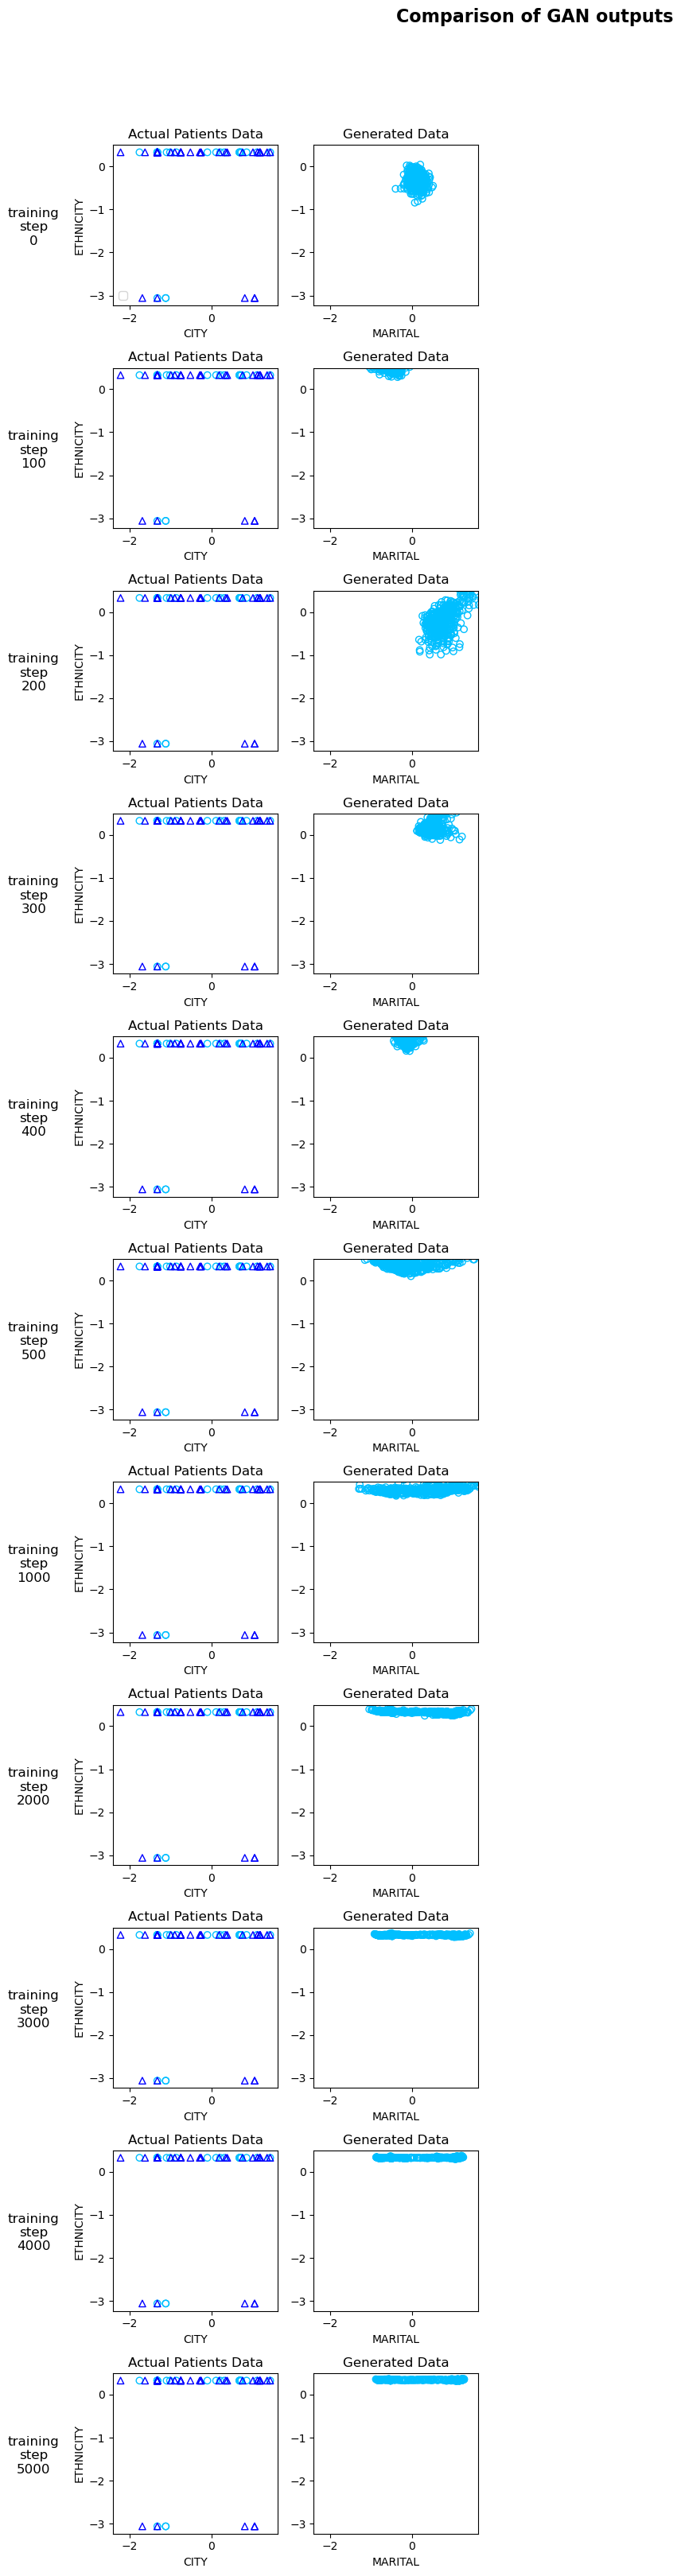

In [26]:
import matplotlib.pyplot as plt

# Setup parameters visualization parameters
seed = 17
test_size = 492 # number of fraud cases
noise_dim = 32

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real, columns=data_cols)

model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']

col1, col2 = 'CITY', 'ETHNICITY'

base_dir = 'model/'

#Actual fraud data visualization
model_steps = [ 0, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)

fig = plt.figure(figsize=(14,rows*3))

for model_step_ix, model_step in enumerate(model_steps):        
    axarr[model_step_ix] = plt.subplot(rows, columns, model_step_ix*columns + 1)
    
    for group, color, marker in zip(real_samples.groupby('RACE'), colors, markers):
        plt.scatter( group[1][[col1]], group[1][[col2]], marker=marker, edgecolors=color, facecolors='none' )
    
    plt.title('Actual Patients Data')
    plt.ylabel(col2) # Only add y label to left plot
    plt.xlabel(col1)
    xlims, ylims = axarr[model_step_ix].get_xlim(), axarr[model_step_ix].get_ylim()
    
    if model_step_ix == 0: 
        legend = plt.legend()
        legend.get_frame().set_facecolor('white')
    
    i=0
    [model_name, with_class, generator_model] = models['GAN']

    generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')

    ax = plt.subplot(rows, columns, model_step_ix*columns + 1 + (i+1) )

    g_z = generator_model.predict(z)
    gen_samples = pd.DataFrame(g_z, columns=data_cols)
    gen_samples.to_csv('Generated_sample.csv')
    plt.scatter( gen_samples[[col1]], gen_samples[[col2]], marker=markers[0], edgecolors=colors[0], facecolors='none' )
    plt.title("Generated Data")   
    plt.xlabel(data_cols[0])
    ax.set_xlim(xlims), ax.set_ylim(ylims)

plt.suptitle('Comparison of GAN outputs', size=16, fontweight='bold')
plt.tight_layout(rect=[0.075,0,1,0.95])

# Adding text labels for traning steps
vpositions = np.array([ i._position.bounds[1] for i in axarr ])
vpositions += ((vpositions[0] - vpositions[1]) * 0.35 )
for model_step_ix, model_step in enumerate( model_steps ):
    fig.text( 0.05, vpositions[model_step_ix], 'training\nstep\n'+str(model_step), ha='center', va='center', size=12)

plt.savefig('Comparison_of_GAN_outputs.png')

In [28]:
!pip install table_evaluator

In [30]:
gen_df=gen_samples.copy()

In [32]:
#gen_df.drop('Unnamed: 0', axis=1, inplace=True)
print(gen_df.columns)
print(df.shape, gen_df.shape)

Index(['MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'CITY', 'STATE',
       'COUNTY', 'ZIP', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE'],
      dtype='object')
(1171, 11) (492, 11)


1171 492


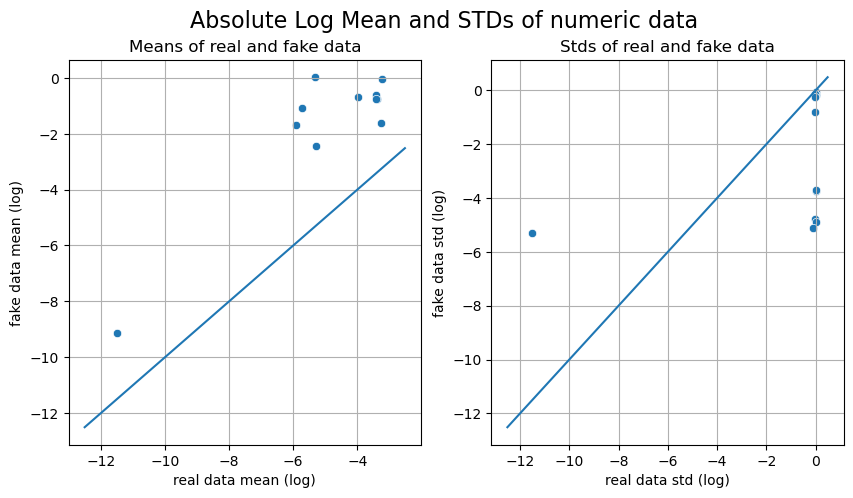

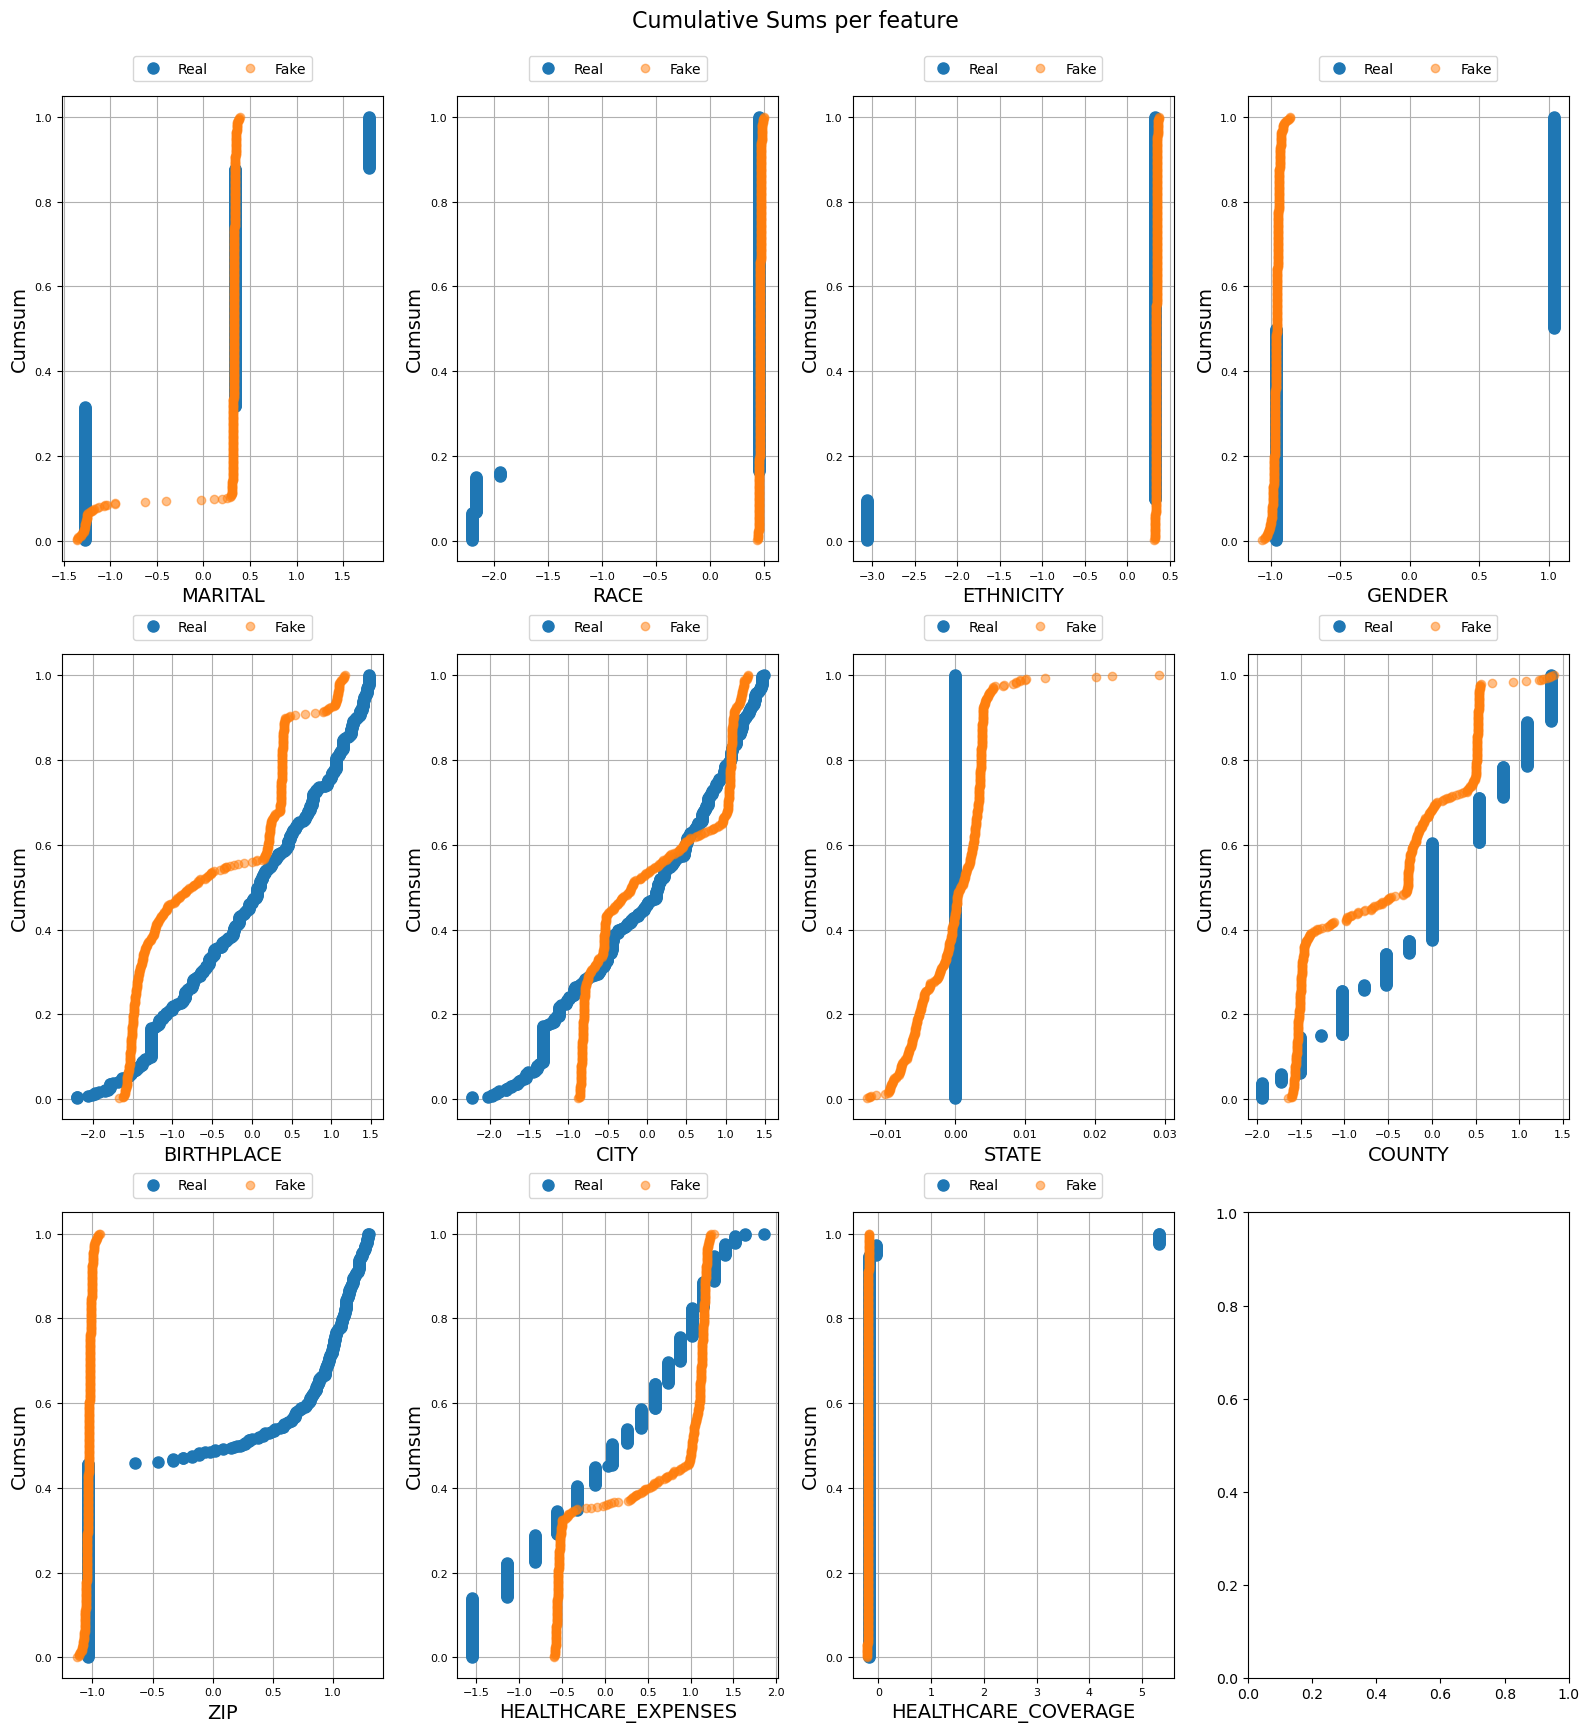

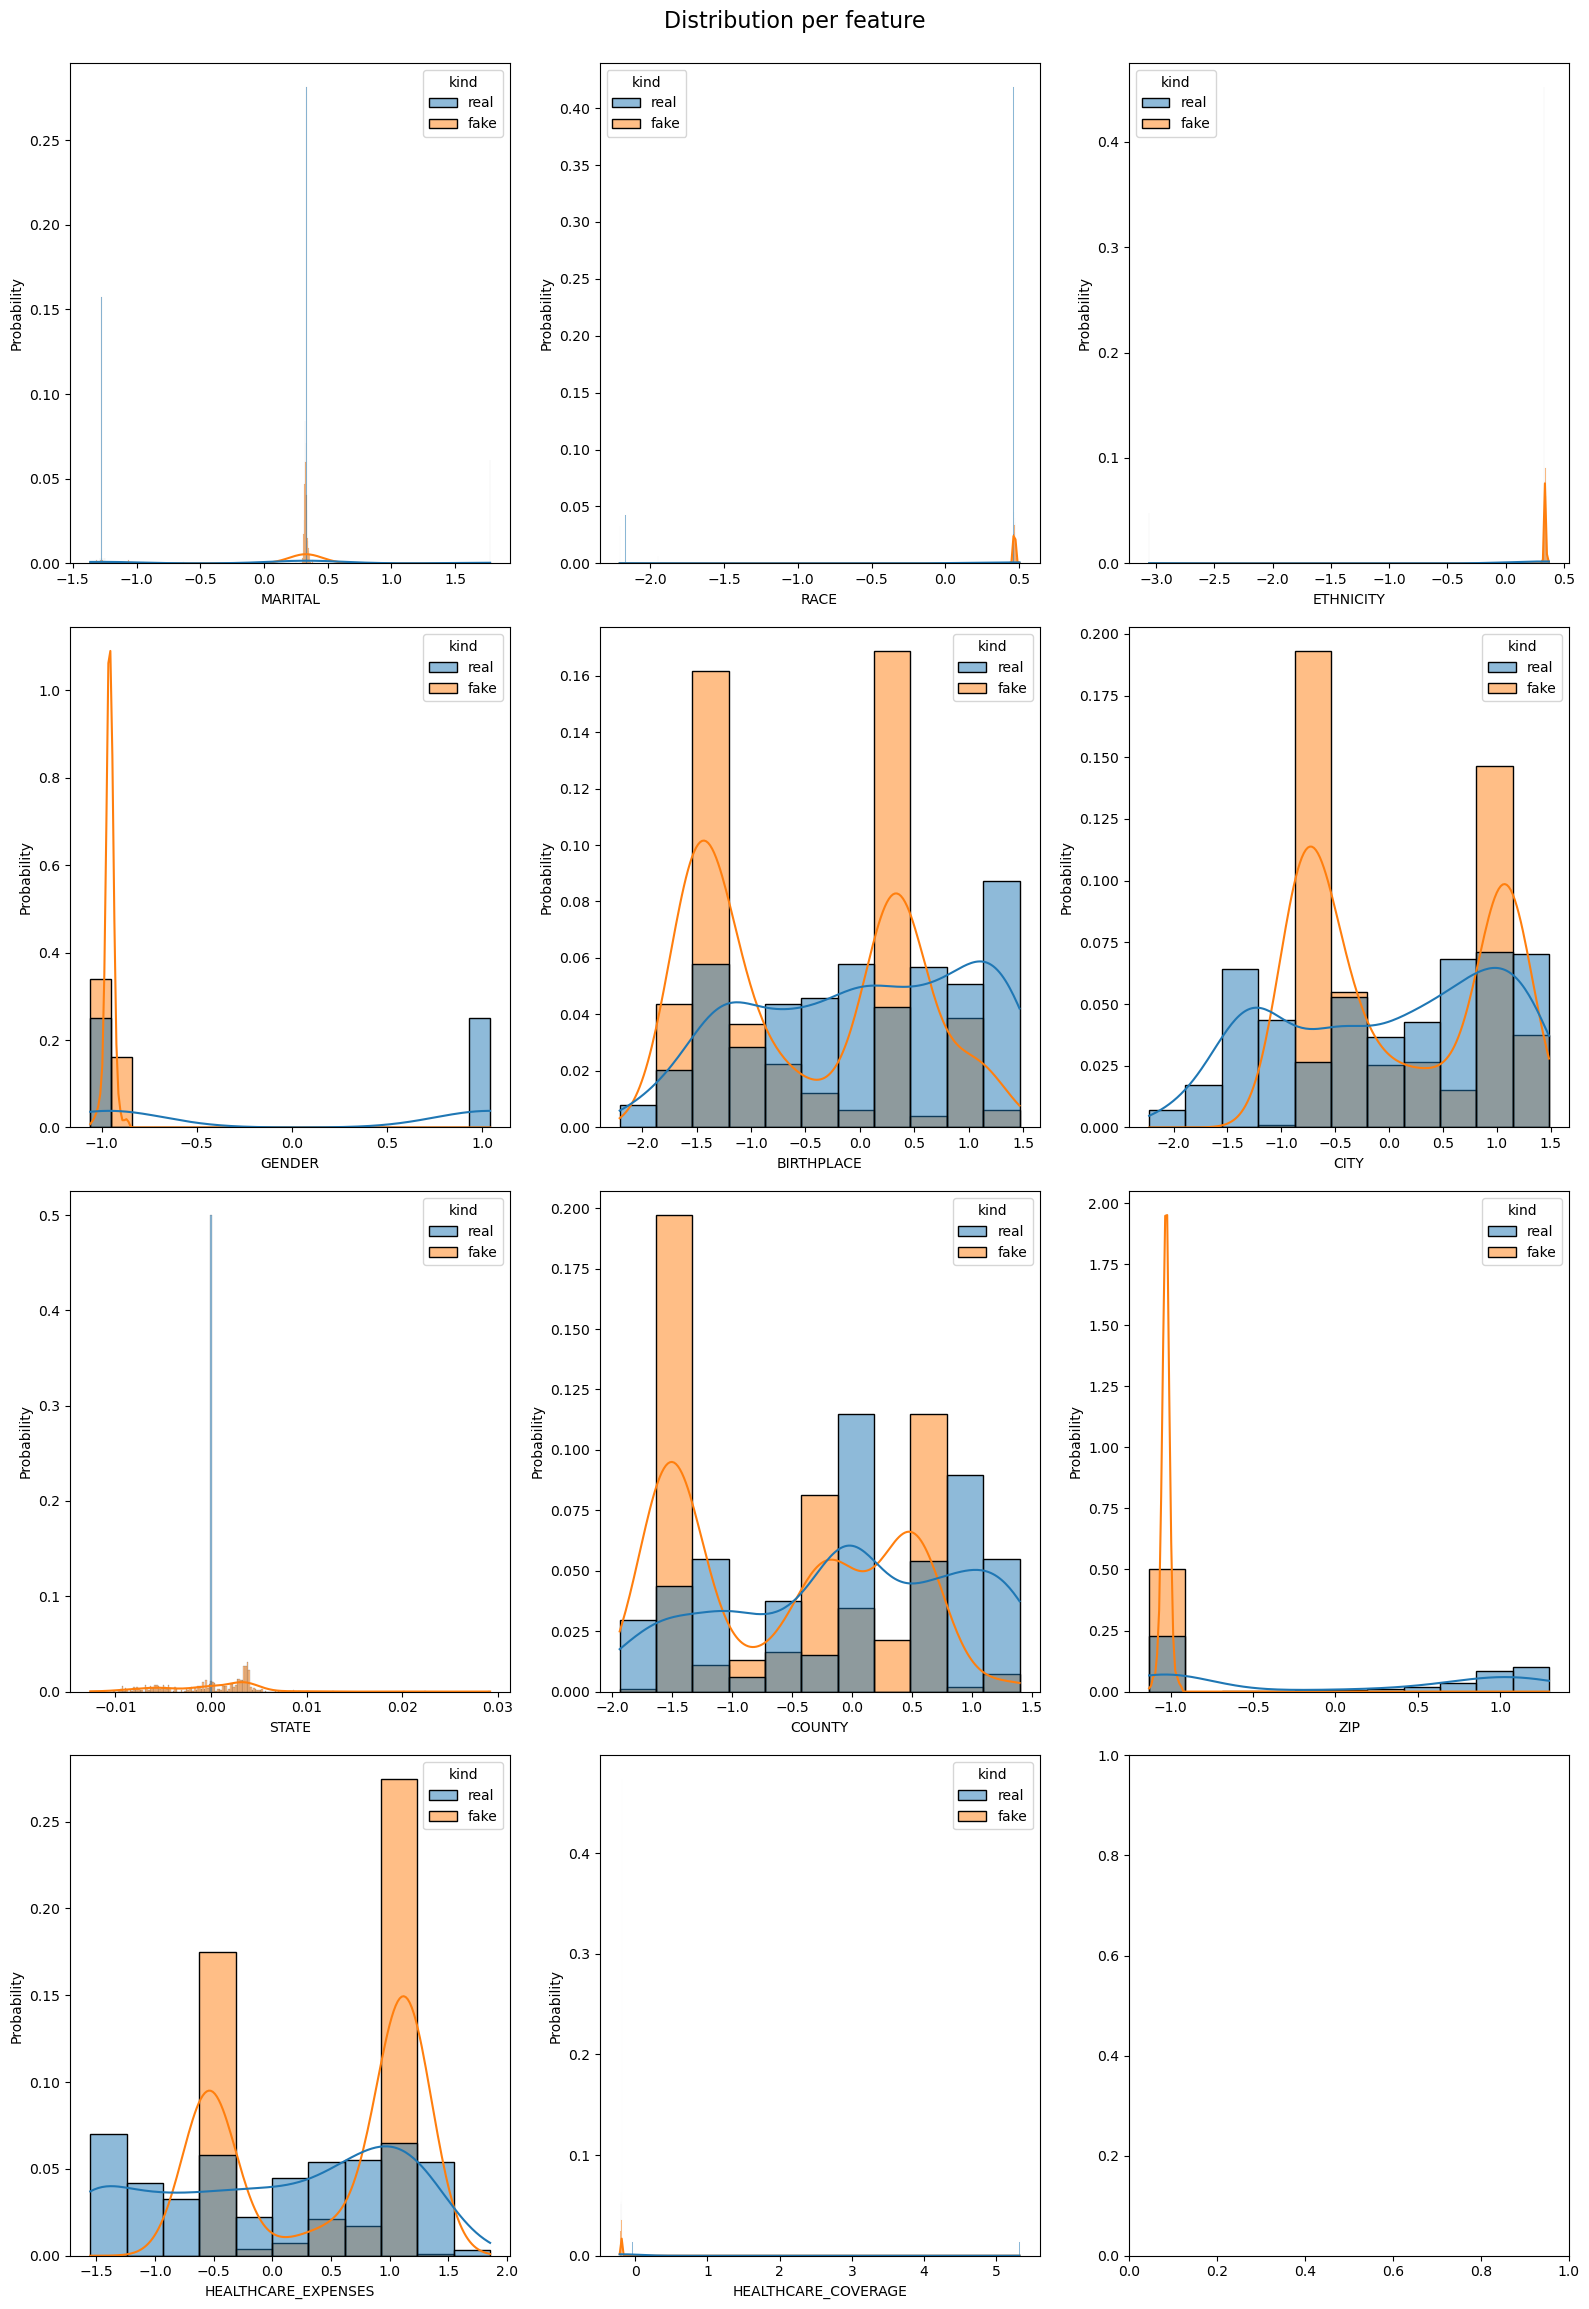

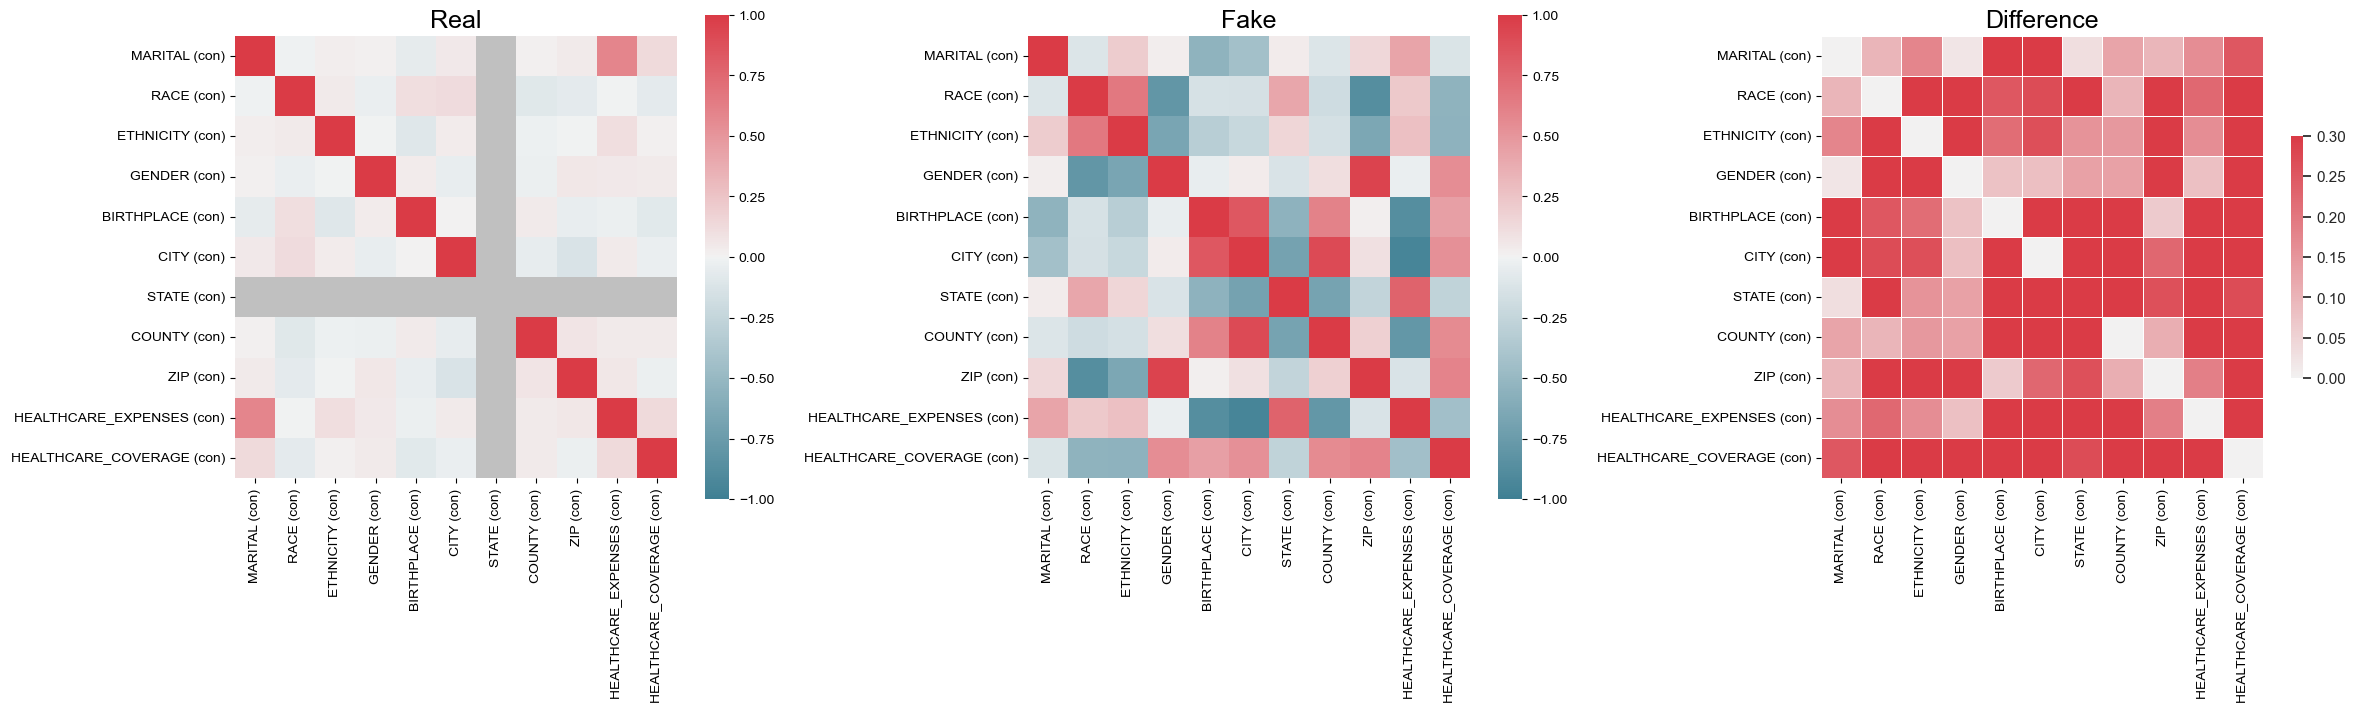

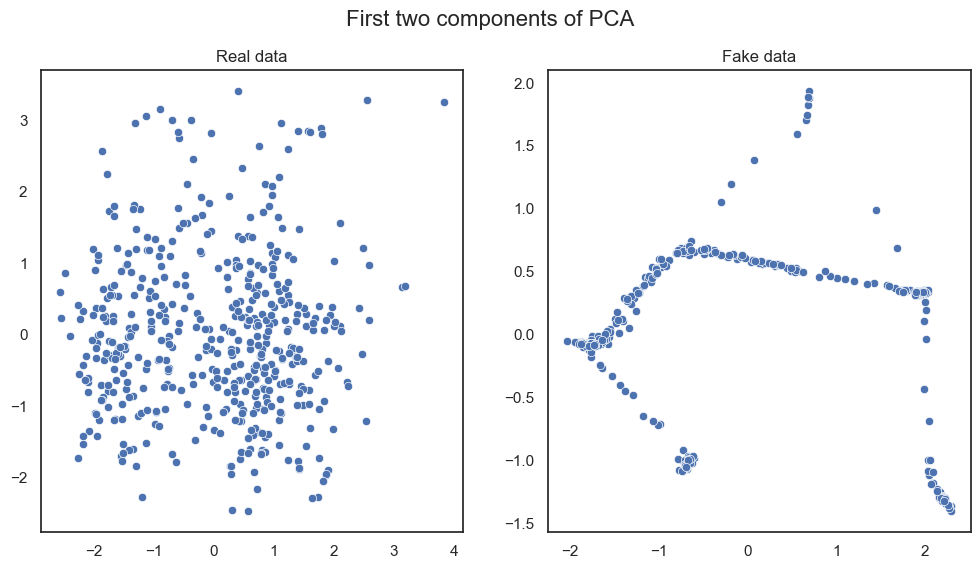

In [33]:
from table_evaluator import load_data, TableEvaluator

cat_cols = ['MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'CITY', 'STATE', 'COUNTY', 'ZIP']

print(len(df), len(gen_df))
table_evaluator =  TableEvaluator(df, gen_df)

table_evaluator.visual_evaluation()